In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns',50)
pd.set_option('display.max_rows', None)
plt.style.use('fivethirtyeight')

### Import the dataset

In [2]:
df = pd.read_excel('Final_LaptopsData.xlsx')

#### Shape of the dataset

In [3]:
df.shape

(577, 20)

#### Sample of the dataset

In [4]:
df.sample(5)

,Brand,Price,Type,Processor Brand,Processor Name,SSD,SSD Capacity,HDD Capacity,EMMC Storage Capacity,RAM,GPU Brand,Operating System,Touchscreen,Screen Size,Fingerprint Sensor,Backlit Keyboard,x_res,y_res,Screen Type,Weight
255,DELL,113104,Thin and Light Laptop,Intel,Core i7,Yes,512,0,0,16,Intel,Windows 11 Home,No,13.3,Yes,Yes,1920,1080,FHD,1.250
5,ASUS,34990,Thin and Light Laptop,Intel,Core i3,Yes,512,0,0,8,Intel,Windows 11 Home,No,15.6,Yes,No,1920,1080,FHD,1.800
205,ASUS,69990,Handheld Gaming PC,AMD,Ryzen Z1 Octa Core,Yes,512,0,0,16,AMD,Windows 11 Home,Yes,7.0,Yes,No,1920,1080,FHD,0.608
60,Infinix,28990,Thin and Light Laptop,Intel,Core i3,Yes,512,0,0,8,Intel,Windows 11 Home,No,15.6,No,Yes,1920,1080,FHD,1.760
79,ASUS,105990,Thin and Light Laptop,Intel,Core i7,Yes,512,0,0,16,Intel,Windows 11 Home,No,15.6,No,Yes,2880,1620,WQXGA,1.700


#### Overview of the dataset

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 577 entries, 0 to 576
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Brand                  577 non-null    object 
 1   Price                  577 non-null    int64  
 2   Type                   577 non-null    object 
 3   Processor Brand        577 non-null    object 
 4   Processor Name         577 non-null    object 
 5   SSD                    577 non-null    object 
 6   SSD Capacity           577 non-null    int64  
 7   HDD Capacity           577 non-null    int64  
 8   EMMC Storage Capacity  577 non-null    int64  
 9   RAM                    577 non-null    int64  
 10  GPU Brand              577 non-null    object 
 11  Operating System       577 non-null    object 
 12  Touchscreen            577 non-null    object 
 13  Screen Size            577 non-null    float64
 14  Fingerprint Sensor     577 non-null    object 
 15  Backli

#### Evaluating Missing values 

In [6]:
df.isnull().sum()

Brand                    0
Price                    0
Type                     0
Processor Brand          0
Processor Name           0
SSD                      0
SSD Capacity             0
HDD Capacity             0
EMMC Storage Capacity    0
RAM                      0
GPU Brand                0
Operating System         0
Touchscreen              0
Screen Size              0
Fingerprint Sensor       0
Backlit Keyboard         0
x_res                    0
y_res                    0
Screen Type              0
Weight                   0
dtype: int64

#### Basic statistical summary of the dataset

In [7]:
df.describe()

,Price,SSD Capacity,HDD Capacity,EMMC Storage Capacity,RAM,Screen Size,x_res,y_res,Weight
count,577.000000,577.000000,577.000000,577.000000,577.000000,577.000000,577.000000,577.000000,577.000000
mean,83313.074523,580.242634,39.861352,1.552860,12.818024,15.045321,2059.341421,1191.414211,1.797224
std,62337.875942,305.264861,195.803140,11.823987,6.476171,1.125834,409.339996,284.949697,0.432532
min,13990.000000,0.000000,0.000000,0.000000,4.000000,7.000000,1280.000000,768.000000,0.608000
25%,44990.000000,512.000000,0.000000,0.000000,8.000000,14.000000,1920.000000,1080.000000,1.470000
50%,63490.000000,512.000000,0.000000,0.000000,16.000000,15.600000,1920.000000,1080.000000,1.700000
75%,100990.000000,512.000000,0.000000,0.000000,16.000000,15.600000,1920.000000,1080.000000,2.100000
max,480990.000000,2000.000000,1000.000000,128.000000,64.000000,18.000000,3840.000000,2400.000000,3.310000


### Labeling the types of column 

#### 1. Numerical Columns: 
- Price in INR, SSD Capacity in GBs, HDD Capacity in GBs, EMMC Storage Capacity in GBs, RAM in GBs, Screen Size in inches, x_res in pixels, y_res in pixels, Weight in Kgs

#### 2. Categorical Columns:
- Type, Processor Brand, Processor Name, Operating System, Touchscreen, Fingerprint Sensor, Backlit Keyboard, Screen Type, GPU Brand, Brand

#### ----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
## Univariate Analysis of the Numerical columns

### Univariate analysis of `Price` attribute

#### Basic Statistical summary of the attribute

In [8]:
df['Price'].describe()

count       577.000000
mean      83313.074523
std       62337.875942
min       13990.000000
25%       44990.000000
50%       63490.000000
75%      100990.000000
max      480990.000000
Name: Price, dtype: float64

#### Histogram plot

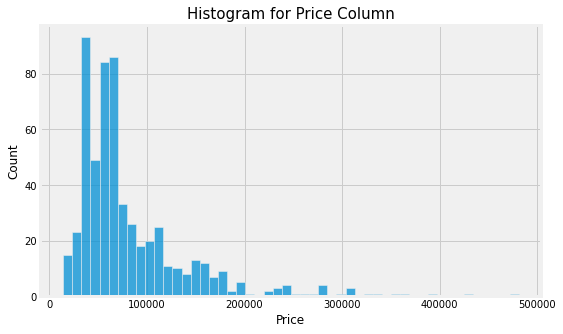

In [9]:
plt.figure(figsize=(8,5))
plt.title('Histogram for Price Column', size=15)
sns.histplot(data=df, x='Price', bins=50)
plt.show()

#### Kenrnel density estimation plot

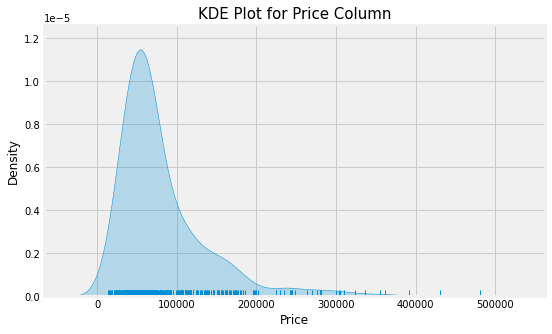

In [10]:
plt.figure(figsize=(8,5))
plt.title('KDE Plot for Price Column', size=15)
sns.kdeplot(data=df, x='Price', fill=True)
sns.rugplot(data=df, x='Price')
plt.show()

#### Finding the maximum value of price above which outliers appear

In [11]:
q1_price=df['Price'].quantile(q=0.25)
q3_price=df['Price'].quantile(q=0.75)
iqr_price = q3_price-q1_price
q3_price+(1.5*iqr_price)

184990.0

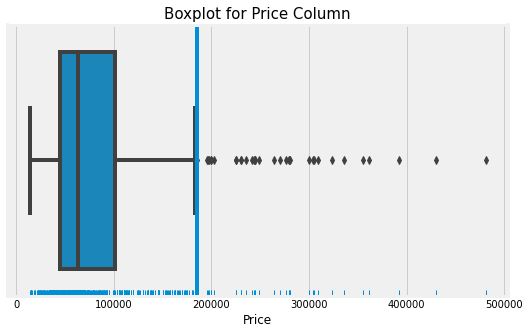

In [12]:
plt.figure(figsize=(8,5))
plt.title('Boxplot for Price Column', size=15)
sns.boxplot(data=df, x='Price')
plt.axvline(x=q3_price+(1.5*iqr_price))
sns.rugplot(data=df, x='Price')
plt.show()

#### Skewness

In [13]:
df['Price'].skew()

2.4611038222329986

#### Analysis of the outliers

In [14]:
df[df['Price']>=184990].shape

(34, 20)

In [15]:
df[df['Price']>=184990]

,Brand,Price,Type,Processor Brand,Processor Name,SSD,SSD Capacity,HDD Capacity,EMMC Storage Capacity,RAM,GPU Brand,Operating System,Touchscreen,Screen Size,Fingerprint Sensor,Backlit Keyboard,x_res,y_res,Screen Type,Weight
141,ASUS,279990,Gaming Laptop,Intel,Core i9,Yes,1000,0,0,32,NVIDIA,Windows 11 Home,No,16.0,No,Yes,2560,1600,WQXGA,2.50
156,APPLE,229990,Laptop,Apple,M2 Pro,Yes,512,0,0,16,Apple,macOS Ventura,No,16.0,No,Yes,3456,2234,3K and higher,2.15
179,APPLE,248490,Laptop,Apple,M2 Pro,Yes,1000,0,0,16,Apple,macOS Ventura,No,16.0,No,Yes,3456,2234,3K and higher,2.15
233,APPLE,229990,Thin and Light Laptop,Apple,M2 Pro,Yes,1000,0,0,16,Apple,macOS Ventura,No,14.0,No,Yes,3024,1964,3K and higher,1.60
238,ASUS,224990,Gaming Laptop,AMD,Ryzen 7 Octa Core,Yes,2000,0,0,32,NVIDIA,Windows 11 Home,No,16.0,No,Yes,1920,1200,WUXGA,2.50
261,APPLE,225090,Thin and Light Laptop,Apple,M1 Pro,Yes,1000,0,0,16,Apple,Mac OS Monterey,No,14.2,No,Yes,3024,1964,3K and higher,1.60
290,APPLE,309490,Laptop,Apple,M1 Max,Yes,1000,0,0,32,Apple,Mac OS Monterey,No,16.2,No,Yes,3456,2234,3K and higher,2.20
303,ASUS,263990,Gaming Laptop,Intel,Core i9,Yes,2000,0,0,32,NVIDIA,Windows 11 Home,No,16.0,No,Yes,2560,1600,WQXGA,2.00
313,MSI,354990,Gaming Laptop,Intel,Core i9,Yes,2000,0,0,32,NVIDIA,Windows 11 Home,No,17.0,No,No,2560,1600,WQXGA,3.00
321,Acer,199990,Gaming Laptop,Intel,Core i7,Yes,1000,0,0,32,NVIDIA,Windows 11 Home,No,16.0,No,Yes,2560,1600,WQXGA,2.60


In [16]:
df[df['Price']>=184990]['Type'].value_counts()

Gaming Laptop            24
Laptop                    8
Thin and Light Laptop     2
Name: Type, dtype: int64

In [17]:
df[df['Price']==df['Price'].max()]

,Brand,Price,Type,Processor Brand,Processor Name,SSD,SSD Capacity,HDD Capacity,EMMC Storage Capacity,RAM,GPU Brand,Operating System,Touchscreen,Screen Size,Fingerprint Sensor,Backlit Keyboard,x_res,y_res,Screen Type,Weight
438,MSI,480990,Gaming Laptop,Intel,Core i9,Yes,2000,0,0,64,NVIDIA,Windows 11 Home,No,17.3,No,Yes,3840,2160,3K and higher,3.3


#### Conclusion on Univariate analysis on `Price` column
- The data is highly right skewed with skewness being 2.46 as it contains some of the very expensive laptops which are being treated as outliers.
- In all of the laptops available the average laptop costs around 83,000 rupees.
- The costliest laptop is a gaming laptop by MSI with all top end specs priced at 4,80,990 rupees

### Univariate Analysis of `SSD Capacity` attribute

#### Basic Statistical summary of the attribute

In [18]:
df['SSD Capacity'].describe()

count     577.000000
mean      580.242634
std       305.264861
min         0.000000
25%       512.000000
50%       512.000000
75%       512.000000
max      2000.000000
Name: SSD Capacity, dtype: float64

#### Histogram plot

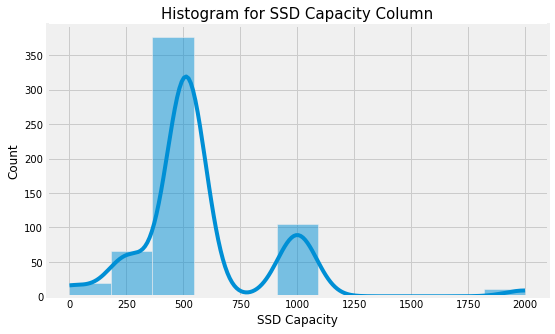

In [19]:
plt.figure(figsize=(8,5))
plt.title('Histogram for SSD Capacity Column', size=15)
sns.histplot(data=df, x='SSD Capacity', kde=True)
plt.show()

#### Observing the frequent values

In [20]:
df['SSD Capacity'].value_counts()

512     376
1000    105
256      66
0        16
2000     10
128       3
8         1
Name: SSD Capacity, dtype: int64

In [21]:
df[df['SSD Capacity']==8]

,Brand,Price,Type,Processor Brand,Processor Name,SSD,SSD Capacity,HDD Capacity,EMMC Storage Capacity,RAM,GPU Brand,Operating System,Touchscreen,Screen Size,Fingerprint Sensor,Backlit Keyboard,x_res,y_res,Screen Type,Weight
558,HP,59129,2 in 1 Laptop,Intel,Core i3,Yes,8,1000,0,4,NVIDIA,Windows 10 Home,Yes,14.0,Yes,No,1920,1080,FHD,1.68


#### Conclusion on Univariate analysis on `SSD Capacity` column
- SSD Capacity is of Discrete numerical type with recurring discrete values which are 0,8,128,256,512,1000,2000 all in GBs.
- The most frequent value is 512 GB followed by 10000 GB.
- Only one instance is observed where its 8 GB which belongs to a HP convertible laptop which has 1000 GB HDD.

---
### Univariate analysis of `HDD Capacity` attribute

#### Basic Statistical summary of the attribute

In [22]:
df['HDD Capacity'].describe()

count     577.000000
mean       39.861352
std       195.803140
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max      1000.000000
Name: HDD Capacity, dtype: float64

#### Histogram

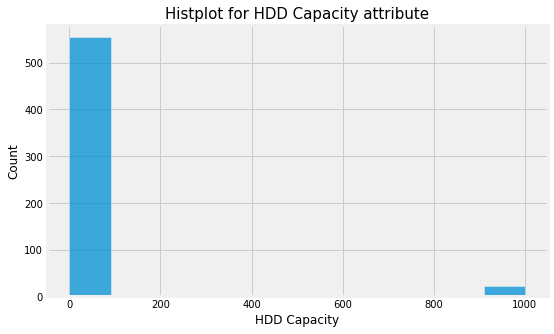

In [23]:
plt.figure(figsize=(8,5))
plt.title('Histplot for HDD Capacity attribute', size=15)
sns.histplot(data=df, x='HDD Capacity')
plt.show()

#### Observing the frequent values

In [24]:
df['HDD Capacity'].value_counts()

0       554
1000     23
Name: HDD Capacity, dtype: int64

#### Observations on `HDD Capacity` column
- Only two discrete values are prsent, either 0 or 1000 GB
- Most of the laptops does not have HDDs, it suggests that laptops are mostly getting manufactured with SSDs rather than HDDs which is because of the following advatages of SSDs over HDDs:
    - **Faster**: 100 times faster than HDDs as they lack mechanical parts, has parallel data access, and low latency i.e quickly responds to read and write requests.
    - **Power**: SSDs consume less power than HDDs, leading to improved battery life in laptops.
    - **Size**: SSDs are smaller and lighter than HDDs, which allows laptop manufacturers to design thinner and lighter laptops.


---
### Univariate analysis of `EMMC Storage Capacity` attribute

#### Basic Statistical summary of the attribute

In [25]:
df['EMMC Storage Capacity'].describe()

count    577.000000
mean       1.552860
std       11.823987
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max      128.000000
Name: EMMC Storage Capacity, dtype: float64

#### Histogram

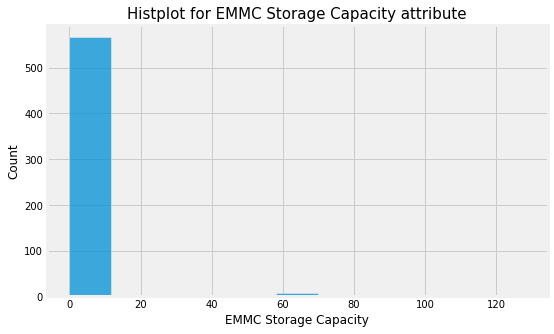

In [26]:
plt.figure(figsize=(8,5))
plt.title('Histplot for EMMC Storage Capacity attribute', size=15)
sns.histplot(data=df, x='EMMC Storage Capacity')
plt.show()

#### Observing the frequent values

In [27]:
df['EMMC Storage Capacity'].value_counts()

0      566
64       8
128      3
Name: EMMC Storage Capacity, dtype: int64

#### Analysing the records corresponding to 128 GB EMMC storage 

In [28]:
df[df['EMMC Storage Capacity']==128]

,Brand,Price,Type,Processor Brand,Processor Name,SSD,SSD Capacity,HDD Capacity,EMMC Storage Capacity,RAM,GPU Brand,Operating System,Touchscreen,Screen Size,Fingerprint Sensor,Backlit Keyboard,x_res,y_res,Screen Type,Weight
7,Primebook,14990,Thin and Light Laptop,MediaTek,MediaTek MT8788,No,0,0,128,4,MediaTek,Prime OS,No,11.0,No,No,1366,768,HD,1.065
73,Primebook,14990,Thin and Light Laptop,MediaTek,MediaTek MT8788,No,0,0,128,4,MediaTek,Prime OS,No,11.6,No,No,1366,768,HD,1.065
202,SAMSUNG,32990,Thin and Light Laptop,Qualcomm,Snapdragon 7c Gen 2,No,0,0,128,4,Qualcomm,Windows 11 Home,No,14.0,No,No,1920,1080,FHD,1.380


#### Observations of `EMMC Storage Capacity` column:
- Only three discrete numeric types 0, 64, 128 all in GBs among which 98% is 0
- It is also observed that the prices in these case are cheaper compared to laptops which consist of SSDs or HDDs.

---
### Univariate analysis of `RAM` attribute

#### Basic Statistical summary of the attribute

In [29]:
df['RAM'].describe()

count    577.000000
mean      12.818024
std        6.476171
min        4.000000
25%        8.000000
50%       16.000000
75%       16.000000
max       64.000000
Name: RAM, dtype: float64

#### Histogram

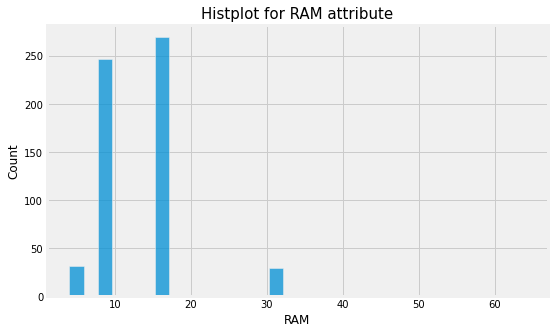

In [30]:
plt.figure(figsize=(8,5))
plt.title('Histplot for RAM attribute', size=15)
sns.histplot(data=df, x='RAM')
plt.show()

#### Observing the frequent values

In [31]:
df['RAM'].value_counts()

16    269
8     247
4      31
32     29
64      1
Name: RAM, dtype: int64

#### Analysing the record corresponding to 64 GB RAM

In [32]:
df[df['RAM']==64]

,Brand,Price,Type,Processor Brand,Processor Name,SSD,SSD Capacity,HDD Capacity,EMMC Storage Capacity,RAM,GPU Brand,Operating System,Touchscreen,Screen Size,Fingerprint Sensor,Backlit Keyboard,x_res,y_res,Screen Type,Weight
438,MSI,480990,Gaming Laptop,Intel,Core i9,Yes,2000,0,0,64,NVIDIA,Windows 11 Home,No,17.3,No,Yes,3840,2160,3K and higher,3.3


#### Observations of `RAM` column:
- The numeric data is specifically of the discrete type with recurring values of 4, 8, 16, 32 all in GBs and only one instance of 64 GB RAM
- The laptop with 64 GB RAM is the most expensive one as found earlier in the univariate analysis of price attribute, it is the same gaming laptop by MSI.
- No specific distribution of the dataset is observed.

---
### Univariate analysis of `Screen Size` attribute

#### Basic Statistical summary of the attribute

In [33]:
df['Screen Size'].describe()

count    577.000000
mean      15.045321
std        1.125834
min        7.000000
25%       14.000000
50%       15.600000
75%       15.600000
max       18.000000
Name: Screen Size, dtype: float64

#### Histogram

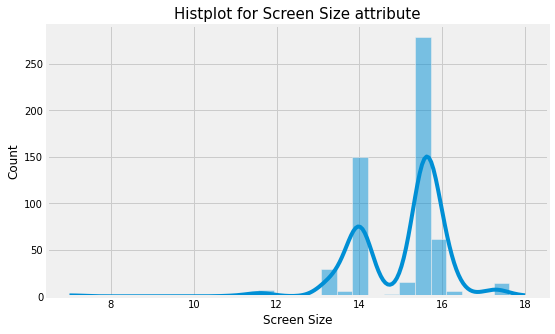

In [34]:
plt.figure(figsize=(8,5))
plt.title('Histplot for Screen Size attribute', size=15)
sns.histplot(data=df, x='Screen Size', kde=True)
plt.show()

#### Locating the point below which outliers are present

In [35]:
q1_ScreenS=df['Screen Size'].quantile(q=0.25)
q3_ScreenS=df['Screen Size'].quantile(q=0.75)
iqr_ScreenS = q3_ScreenS-q1_ScreenS
q1_ScreenS-(1.5*iqr_ScreenS)

11.600000000000001

#### Boxplot

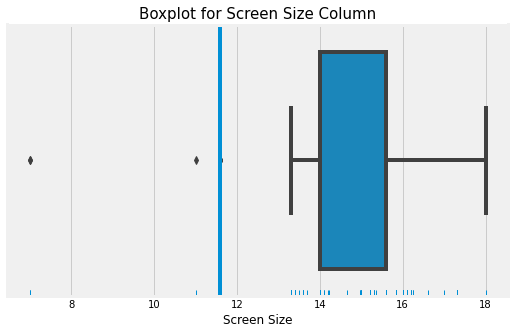

In [36]:
plt.figure(figsize=(8,5))
plt.title('Boxplot for Screen Size Column', size=15)
sns.boxplot(data=df, x='Screen Size')
plt.axvline(x=q1_ScreenS-(1.5*iqr_ScreenS))
sns.rugplot(data=df, x='Screen Size')
plt.show()

#### Analysis of the outliers

In [37]:
df[df['Screen Size']<=11.6].shape

(10, 20)

In [38]:
df[df['Screen Size']<=11.6]

,Brand,Price,Type,Processor Brand,Processor Name,SSD,SSD Capacity,HDD Capacity,EMMC Storage Capacity,RAM,GPU Brand,Operating System,Touchscreen,Screen Size,Fingerprint Sensor,Backlit Keyboard,x_res,y_res,Screen Type,Weight
1,Primebook,13990,Thin and Light Laptop,MediaTek,MediaTek MT8788,No,0,0,64,4,MediaTek,Prime OS,No,11.6,No,No,1366,768,HD,1.065
7,Primebook,14990,Thin and Light Laptop,MediaTek,MediaTek MT8788,No,0,0,128,4,MediaTek,Prime OS,No,11.0,No,No,1366,768,HD,1.065
17,ASUS,17990,Chromebook,Intel,Celeron Dual Core,No,0,0,64,4,Intel,Chrome,No,11.6,No,No,1366,768,HD,1.240
73,Primebook,14990,Thin and Light Laptop,MediaTek,MediaTek MT8788,No,0,0,128,4,MediaTek,Prime OS,No,11.6,No,No,1366,768,HD,1.065
90,ASUS,14990,Thin and Light Laptop,Intel,Celeron Dual Core,No,0,0,64,4,Intel,Windows 10 Home,No,11.6,No,No,1366,768,HD,1.050
133,Lenovo,14990,Chromebook,Intel,Celeron Dual Core,No,0,0,64,4,Intel,Chrome,No,11.6,No,No,1366,768,HD,1.120
205,ASUS,69990,Handheld Gaming PC,AMD,Ryzen Z1 Octa Core,Yes,512,0,0,16,AMD,Windows 11 Home,Yes,7.0,Yes,No,1920,1080,FHD,0.608
354,Valve,70990,Handheld Gaming PC,AMD,Zen 2,Yes,512,0,0,16,AMD,Windows 11 Home,Yes,7.0,No,No,1280,800,WXGA,0.670
390,ASUS,28090,Laptop,Intel,Celeron Dual Core,Yes,128,0,0,4,Intel,Windows 11 Home,Yes,11.6,No,Yes,1366,768,HD,1.400
397,Lenovo,25490,Thin and Light Laptop,Intel,Celeron Dual Core,Yes,256,0,0,4,Intel,Windows 10 Home,No,11.6,No,No,1366,768,HD,1.200


#### Observations of `Screen Size` column:
- The distribution is bimodal with 50% of data lying between 14 inches and 16 inches.
- The outliers in this case falls below 11.6 inches, laptops with such small screen (11.6 inches) are actually mini laptops.
- The ones with 7 inches screen are handheld gaming pc which is a type of laptop. Though its main purpose is gaming, still they can be used for performing general computing tasks like web browsing, office work, and media consumption.

---
### Univariate analysis of `Weight` attribute

#### Basic Statistical summary of the attribute

In [39]:
df['Weight'].describe()

count    577.000000
mean       1.797224
std        0.432532
min        0.608000
25%        1.470000
50%        1.700000
75%        2.100000
max        3.310000
Name: Weight, dtype: float64

#### Histogram

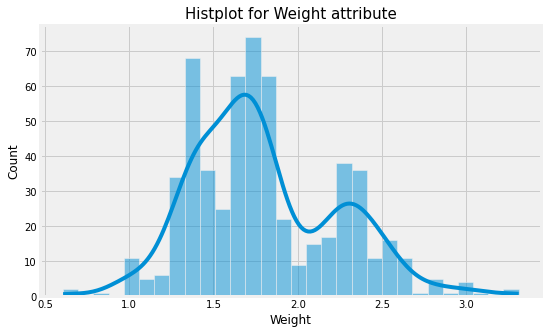

In [40]:
plt.figure(figsize=(8,5))
plt.title('Histplot for Weight attribute', size=15)
sns.histplot(data=df, x='Weight', kde=True, bins=30)
plt.show()

#### Skewness

In [41]:
df['Weight'].skew()

0.5781530348725341

#### Location above which outliers are present

In [42]:
q1_wt=df['Weight'].quantile(q=0.25)
q3_wt=df['Weight'].quantile(q=0.75)
iqr_wt = q3_wt-q1_wt
q3_wt+(1.5*iqr_wt)

3.044999718666076

#### Boxplot

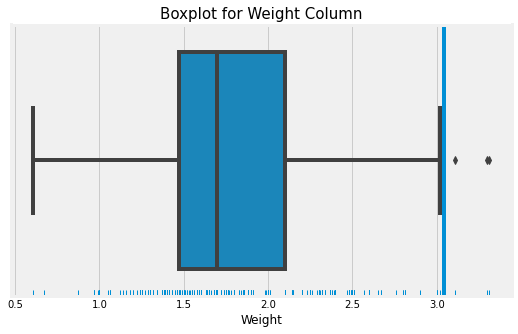

In [43]:
plt.figure(figsize=(8,5))
plt.title('Boxplot for Weight Column', size=15)
sns.boxplot(data=df, x='Weight')
plt.axvline(x=q3_wt+(1.5*iqr_wt))
sns.rugplot(data=df, x='Weight')
plt.show()

#### Analysing the outliers

In [44]:
df[df['Weight']>=q3_wt+(1.5*iqr_wt)]

,Brand,Price,Type,Processor Brand,Processor Name,SSD,SSD Capacity,HDD Capacity,EMMC Storage Capacity,RAM,GPU Brand,Operating System,Touchscreen,Screen Size,Fingerprint Sensor,Backlit Keyboard,x_res,y_res,Screen Type,Weight
326,GIGABYTE,64990,Gaming Laptop,Intel,Core i5,Yes,512,0,0,8,NVIDIA,Windows 11 Home,No,15.6,No,Yes,1920,1080,FHD,3.11
438,MSI,480990,Gaming Laptop,Intel,Core i9,Yes,2000,0,0,64,NVIDIA,Windows 11 Home,No,17.3,No,Yes,3840,2160,3K and higher,3.30
515,DELL,123927,Gaming Laptop,Intel,Core i7,Yes,512,0,0,16,NVIDIA,Windows 11 Home,No,15.6,No,Yes,1920,1080,FHD,3.31


#### Observations of `Weight` column:
- The distributions of weights for the laptops is moderately skewed to the right side.
- 50% of data lies between 1.5 kgs to 2 kgs.
- The heaviest laptops are the gaming laptops as observed while analyziing outliers

---
### Univariate analysis of `x_res` and `y_res` attribute
- Instead analysing x_res ans y_res separately we can create new column named screen resolution in through which both columns can analysed simultaneously.
- Further using x_res, y_res and screen size we can calculate **pixel per inches** to get more details about the display of the laptop.

#### `Screen Resolution` Attribute

In [45]:
df['Screen Resolution']=df['x_res'].astype(str) + 'x' + df['y_res'].astype(str)

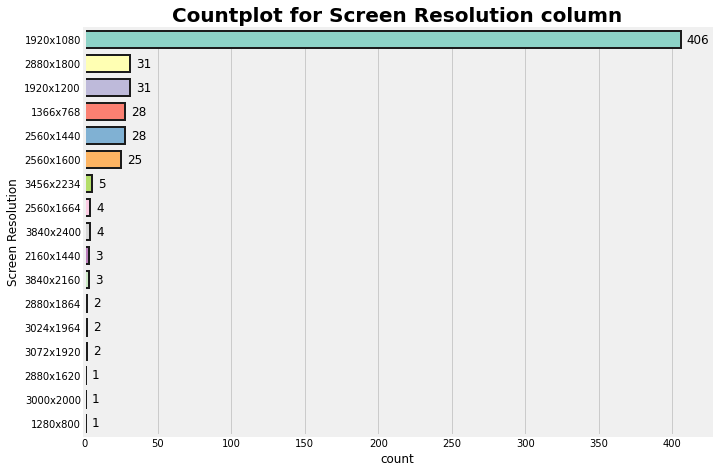

In [46]:
plt.figure(figsize=(10,7.5))
plt.title('Countplot for Screen Resolution column', size=20, fontweight='bold')
ax=sns.countplot(data=df, y='Screen Resolution', palette='Set3', edgecolor = "#1c1c1c",\
              order=df['Screen Resolution'].value_counts().index, saturation=1, linewidth=2, width=0.7)
ax.bar_label(container=ax.containers[0], label_type="edge", padding=6, size=12,color="black",rotation=0)
plt.show()

#### Observations on `Screen Resolution` column:
- Majority of the laptops screen resolution is 1920x1080.
- Some records are observed to have very specific resolution such as 1280x800, 3456x2234, 3000x2000 etc. Such records are just creating more number of categories. This problem was already handled while data assessing wherein a new column named screen type was created based on the given screen resolution.
- Given the problem being already handled we can decide to drop the column as screen type contains the same information but in a concise manner

In [47]:
df.drop(columns='Screen Resolution', inplace=True)

#### `pixel per inches` attribute

In [48]:
df['ppi'] = round((((df['x_res']**2) + (df['y_res']**2))**0.5/df['Screen Size']),2)

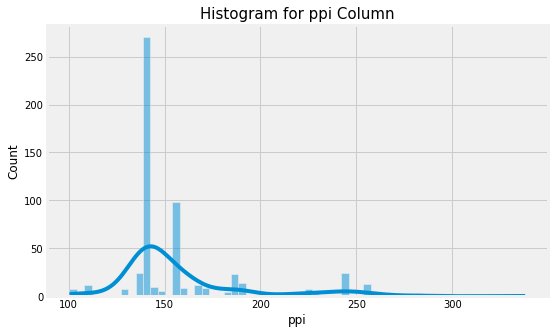

In [49]:
plt.figure(figsize=(8,5))
plt.title('Histogram for ppi Column', size=15)
sns.histplot(data=df, x='ppi', kde=True)
plt.show()

#### Locating the outlier's threshold

In [50]:
q1_ppi=df['ppi'].quantile(q=0.25)
q3_ppi=df['ppi'].quantile(q=0.75)
iqr_ppi = q3_ppi-q1_ppi
q1_ppi-(1.5*iqr_ppi)

117.00000000000003

In [51]:
q3_ppi+(1.5*iqr_ppi)

181.55999999999997

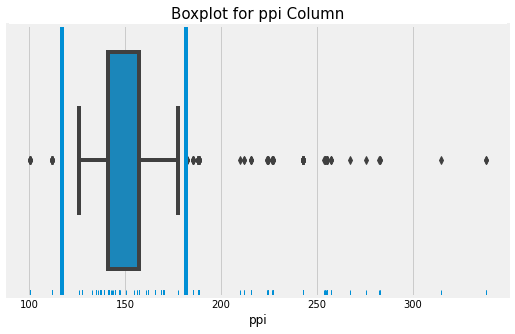

In [52]:
plt.figure(figsize=(8,5))
plt.title('Boxplot for ppi Column', size=15)
sns.boxplot(data=df, x='ppi')
plt.axvline(x=q3_ppi+(1.5*iqr_ppi))
plt.axvline(x=q1_ppi-(1.5*iqr_ppi))
sns.rugplot(data=df, x='ppi')
plt.show()

#### Analysing the outliers

In [53]:
df[df['ppi']<=117]

,Brand,Price,Type,Processor Brand,Processor Name,SSD,SSD Capacity,HDD Capacity,EMMC Storage Capacity,RAM,GPU Brand,Operating System,Touchscreen,Screen Size,Fingerprint Sensor,Backlit Keyboard,x_res,y_res,Screen Type,Weight,ppi
3,HP,27990,Thin and Light Laptop,AMD,Athlon Dual Core,Yes,512,0,0,8,AMD,Windows 11 Home,No,15.6,No,No,1366,768,HD,1.69,100.45
29,HP,22490,Notebook,AMD,Athlon Dual Core,Yes,256,0,0,4,AMD,DOS,No,15.6,No,No,1366,768,HD,2.50,100.45
38,HP,22990,Chromebook,Intel,Celeron Dual Core,No,0,0,64,4,Intel,Chrome,Yes,14.0,No,No,1366,768,HD,1.49,111.94
43,Lenovo,22490,Thin and Light Laptop,AMD,Athlon Dual Core,Yes,256,0,0,4,AMD,Windows 10 Home,No,14.0,No,No,1366,768,HD,1.59,111.94
48,HP,27490,Notebook,AMD,Ryzen 3 Quad Core,Yes,512,0,0,8,AMD,DOS,No,14.0,No,No,1366,768,HD,1.47,111.94
70,HP,35990,Laptop,Intel,Core i3,Yes,512,0,0,8,Intel,Windows 11 Home,No,15.6,No,No,1366,768,HD,2.00,100.45
94,ASUS,24990,Thin and Light Laptop,Intel,Celeron Dual Core,Yes,256,0,0,4,Intel,Windows 11 Home,No,14.0,Yes,No,1366,768,HD,1.60,111.94
220,HP,35490,Business Laptop,Intel,Core i3,Yes,512,0,0,8,Intel,Windows 11 Home,No,14.0,No,No,1366,768,HD,1.47,111.94
231,ASUS,26990,Thin and Light Laptop,Intel,Celeron Quad Core,Yes,256,0,0,4,Intel,Windows 11 Home,No,15.6,Yes,No,1366,768,HD,1.80,100.45
264,Lenovo,28490,Thin and Light Laptop,Intel,Celeron Dual Core,Yes,256,0,0,8,Intel,Windows 11 Home,No,14.0,No,No,1366,768,HD,1.30,111.94


In [54]:
df[df['ppi']>=q3_ppi+(1.5*iqr_ppi)]

,Brand,Price,Type,Processor Brand,Processor Name,SSD,SSD Capacity,HDD Capacity,EMMC Storage Capacity,RAM,GPU Brand,Operating System,Touchscreen,Screen Size,Fingerprint Sensor,Backlit Keyboard,x_res,y_res,Screen Type,Weight,ppi
8,realme,32990,Thin and Light Laptop,Intel,Core i3,Yes,256,0,0,8,Intel,Windows 10 Home,No,14.00,Yes,Yes,2160,1440,QHD,1.380,185.43
19,APPLE,79990,Thin and Light Laptop,Apple,M1,Yes,256,0,0,8,Apple,Mac OS Big Sur,No,13.30,No,No,2560,1600,WQXGA,1.290,226.98
71,APPLE,107910,Thin and Light Laptop,Apple,M2,Yes,256,0,0,8,Apple,Mac OS Monterey,No,13.60,No,Yes,2560,1664,WQXGA,1.240,224.51
74,ASUS,68990,Thin and Light Laptop,Intel,Core i5,Yes,512,0,0,16,Intel,Windows 11 Home,No,14.00,Yes,Yes,2880,1800,2.8K,1.500,242.59
79,ASUS,105990,Thin and Light Laptop,Intel,Core i7,Yes,512,0,0,16,Intel,Windows 11 Home,No,15.60,No,Yes,2880,1620,WQXGA,1.700,211.82
82,APPLE,107990,Thin and Light Laptop,Apple,M2,Yes,256,0,0,8,Apple,Mac OS Monterey,No,13.60,No,Yes,2560,1664,WQXGA,1.240,224.51
122,Lenovo,68990,Thin and Light Laptop,Intel,Core i5,Yes,512,0,0,16,Intel,Windows 11 Home,No,14.00,No,Yes,2880,1800,2.8K,1.300,242.59
141,ASUS,279990,Gaming Laptop,Intel,Core i9,Yes,1000,0,0,32,NVIDIA,Windows 11 Home,No,16.00,No,Yes,2560,1600,WQXGA,2.500,188.68
144,realme,54999,Thin and Light Laptop,Intel,Core i5,Yes,512,0,0,16,Intel,Windows 11 Home,No,14.00,Yes,Yes,2160,1440,QHD,1.370,185.43
148,ASUS,109990,Thin and Light Laptop,Intel,Core i7,Yes,512,0,0,16,Intel,Windows 11 Home,Yes,14.00,Yes,Yes,2880,1800,2.8K,1.390,242.59


#### Observations on `ppi` column:
- 50% of the laptops have ppi between 141 to 160 which signifies high pixel density hence depth, clarity and smoothness in the display.
- There are 20 laptops for ppi less than 117 with varying prices from 22,000 to 60,000
- 107 laptops have ppi greater than 181.

#### ----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
## Univariate Analysis of the Categorical columns

 #### Taking a look at the total number of categories in each categorical column .

In [55]:
df.select_dtypes(include='object').nunique().sort_values(ascending=False)

Processor Name        29
Brand                 16
Operating System      12
Type                  10
Screen Type            8
GPU Brand              6
Processor Brand        5
SSD                    2
Touchscreen            2
Fingerprint Sensor     2
Backlit Keyboard       2
dtype: int64

#### Countplots and Pie charts

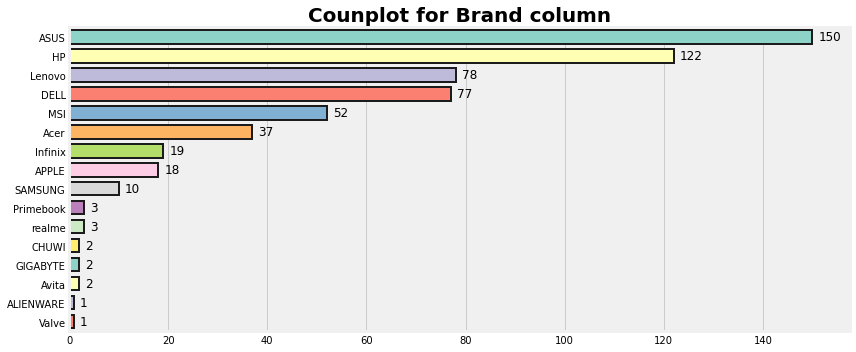


*****************************************************************************************************************************



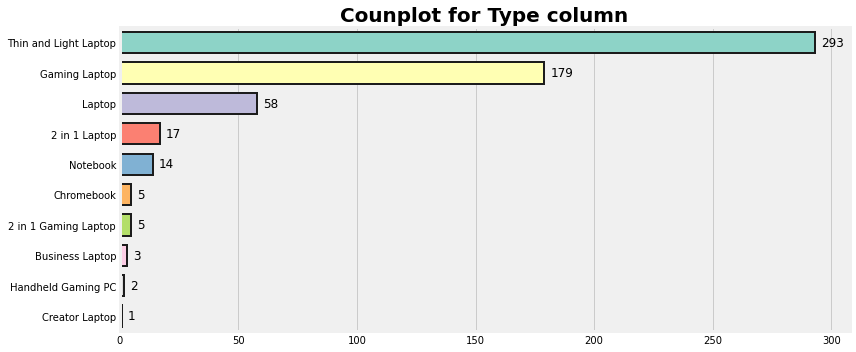


*****************************************************************************************************************************



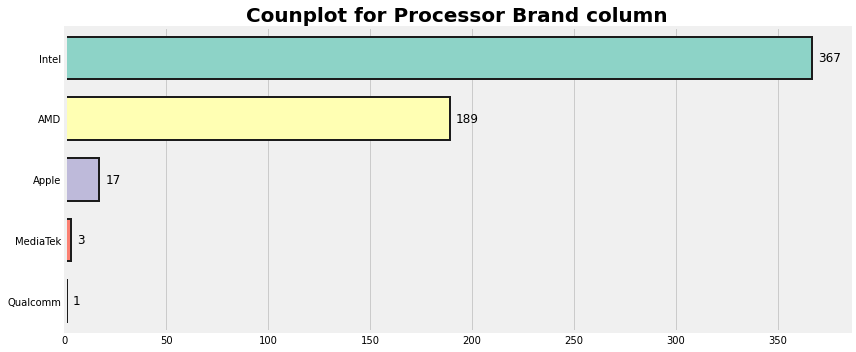


*****************************************************************************************************************************



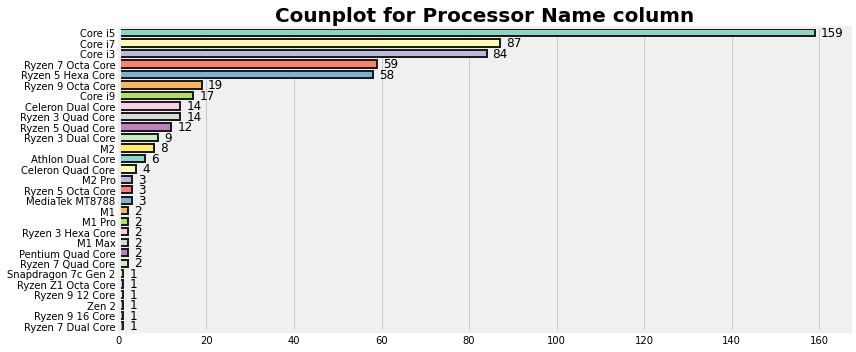


*****************************************************************************************************************************



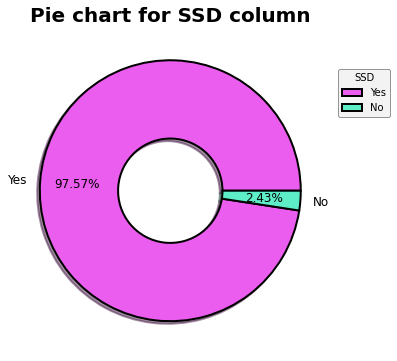


*****************************************************************************************************************************



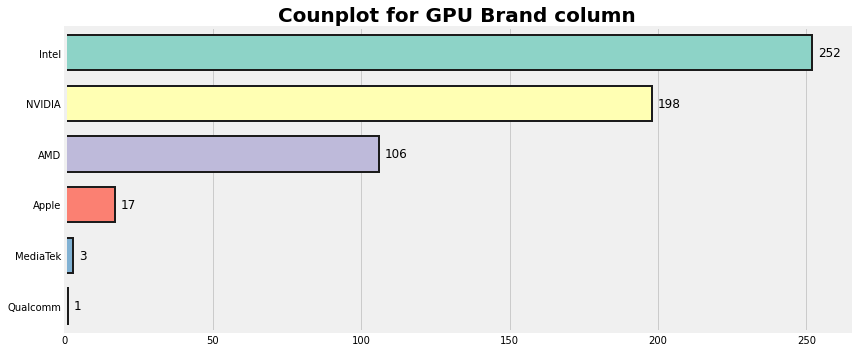


*****************************************************************************************************************************



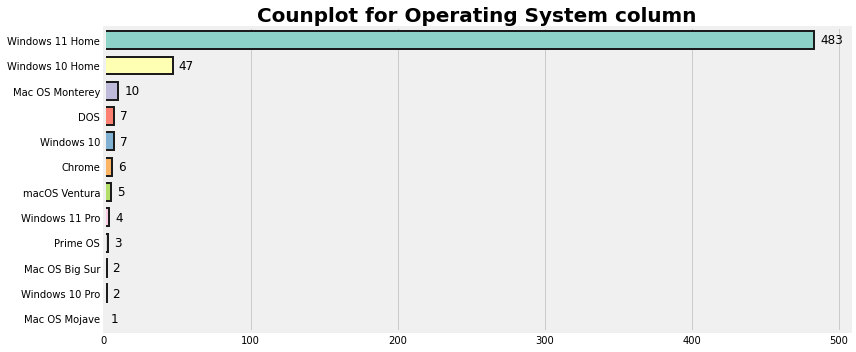


*****************************************************************************************************************************



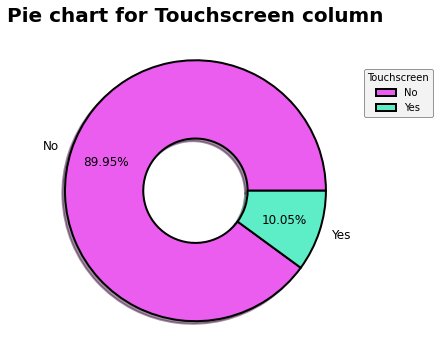


*****************************************************************************************************************************



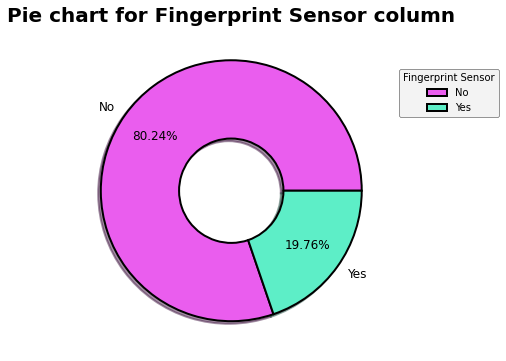


*****************************************************************************************************************************



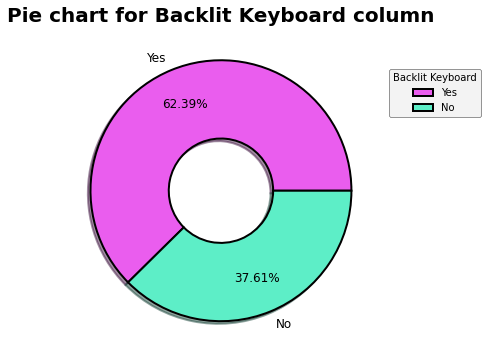


*****************************************************************************************************************************



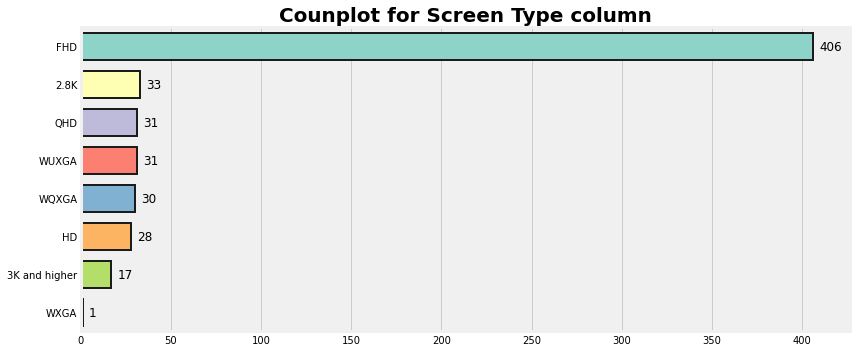


*****************************************************************************************************************************



In [56]:
for col in df.select_dtypes(include='object'):
    if df[col].nunique()>2:
        plt.figure(figsize=(12,5))
        plt.title(f'Counplot for {col} column', fontsize=20, fontweight='bold')
        ax=sns.countplot(data=df, y=col, palette='Set3',\
                  edgecolor = "#1c1c1c", order=df[col].value_counts().index,\
                  saturation=1, linewidth=2, width=0.7)
        ax.bar_label(container=ax.containers[0], label_type="edge",
                     padding=6, size=12,color="black",rotation=0)
        plt.xlabel(None)
        plt.ylabel(None)
        plt.tight_layout()
        plt.show()
        print(f"\n{125*'*'}\n")
    
    else:
        plt.figure(figsize=(6,6))
        plt.title(f'Pie chart for {col} column', fontsize=20, fontweight='bold')
        plt.pie(df[col].value_counts(), labels=df[col].value_counts().index,\
                   shadow = True, colors = ["#ea5dee","#5deec7"], autopct="%.2f%%",\
                   pctdistance = 0.72, wedgeprops=dict(width = 0.6, edgecolor = "black", linewidth = 2),\
                   textprops=dict(size= 12, color= "k"))
        plt.legend(title=col,loc="center left",bbox_to_anchor=(1, 0.3, 1, 1), edgecolor = "black")
        plt.show()
        print(f"\n{125*'*'}\n")

#### Observations for the `Brand` attribute:
- Asus has the largest number (150) of laptops on sell on flipkart followed by HP, Lenovo, Dell.
- Lesser known laptops with just one and two pieces available are Alienware, Valve, Avita, Gigabyte. 
- Note for Feature Engg.
    - lesser known laptops can be combined into a single category 'other' to reduce the number of distinct categories which will put focus on the analysis of  the major brands.

#### Observations for the `Type` attribute:
- 293 laptops in the thin and light category, followed by 179 laptops in the gaming category and then general purpose lapotops. Remaining are just the variations in above three categories.
- Note for Feature Engg.
    - We can merge the categories laptop and notebook under standard laptops as these are general-purpose laptops that are not specifically designed for gaming or specialized tasks.
    - We can combine 'Gaming Laptop,' '2 in 1 Gaming Laptop,' and 'Handheld Gaming PC' into a 'Gaming Laptop' category as these laptops are designed for gaming purposes.
    - We can also create a new category named 'portable laptop' which envelops business, thin and light laptops as these laptops are known for their portability and lightweight design.

####  Observations for the `Processor Brand` attribute:
- Intel tops with 367 instances which is obvious because of its historically dominance over the personal computer, followed by AMD with 189 instances.
- Apple, Mediatek, Qualcomm have lesser instances.

####  Observations for the `Processor Name` attribute:
- The records here are just the drilled downs of the processor brand column.
- Note for Feature Engg.
    - We can combine the Processor brand and name column for simplifications and extract only the relevant string from the records of new column. 

#### Observations for the `SSD` attribute:
- About 97.57% (563 instances) of laptops in the dataset consist of SSDs.

#### Observations for the `GPU Brand` attribute:
- Intel has the largest occurrences followed by NVIDIA and AMD

#### Observations for the `Operating System` attribute:
- As expected Windows(all combined) has the largest instances.
- Note for Feature Engg.
    - We can aggregate the operating systems by major families, such as 'Windows' which will consist of 'Windows 11 Home', 'Windows 10 Home', 'Windows 10', 'Windows 11 Pro', 'Windows 10 Pro'. 
    - Similarly 'Mac OS' will consist Mac OS Monterey', 'macOS Ventura', 'Mac OS Big Sur', 'Mac OS Mojave' etc.

#### Observations for the `Touchscreen` attribute:
- 519 out of 577 (approximately 90%), do not have touchscreen capabilities. This suggests that traditional non-touchscreen laptops are more prevalent in the dataset.
- laptops equipped with touch-sensitive screens accounts for 10%(58 instances) of the dataset.

#### Observations for the `Fingerprint Sensor` attribute:
- Majority of laptops in the dataset do not have a fingerprint sensor.
- 463 laptops (about 80%) do not have a fingerprint sensor, while 114 laptops (about 20%) have a fingerprint sensor.

#### Observations for the `Backlit Keyboard` attribute:
-  A significant number of laptops in the dataset (360 instances) have backlit keyboards. This indicates that backlit keyboards are a relatively common feature among the collected laptops.

#### Observations for the `Screen Type` attribute:
- A significant portion of the laptops in the dataset has FHD displays, which is a standard resolution for many laptops.
- Note for Feature Engg.
    - As 'WXGA' (Wide Extended Graphics Array) has only one instance and represents resolution below FHD we can make it 'HD' for simplification.

### ---------------------------------------------------------------------------------------------------------------------------------------------------------
## Bivariate and Mutivariate Analysis considering the Target variable `Price`

### Numerical-Numerical attributes

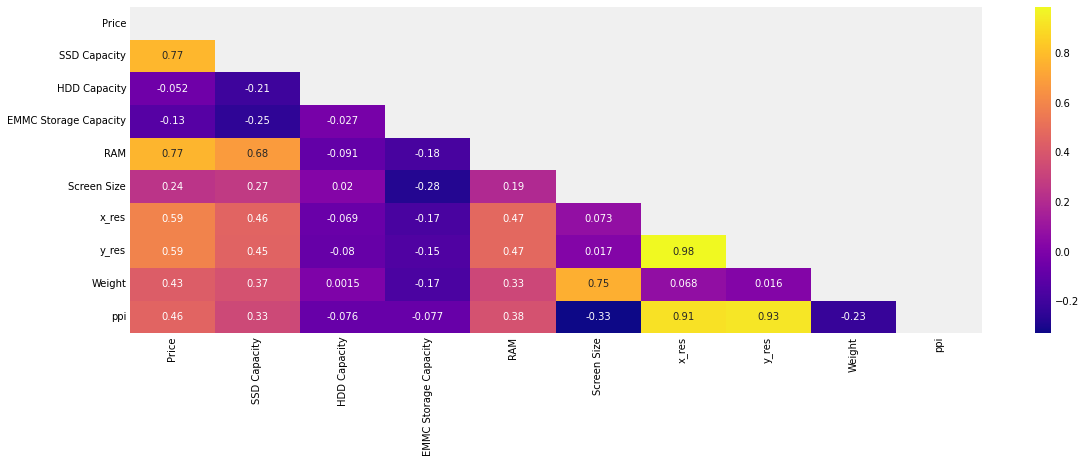

In [57]:
plt.figure(figsize=(17,6))
sns.heatmap(data=df.corr(),annot=True,\
            mask=np.triu(np.ones_like(df.corr(),bool)),\
            cmap='plasma')
plt.show()

#### Observing correlation of price with other variables

In [58]:
df.corr()['Price']

Price                    1.000000
SSD Capacity             0.774016
HDD Capacity            -0.052025
EMMC Storage Capacity   -0.133638
RAM                      0.769134
Screen Size              0.240609
x_res                    0.587975
y_res                    0.587669
Weight                   0.426614
ppi                      0.457657
Name: Price, dtype: float64

### Price Vs SSD Capacity

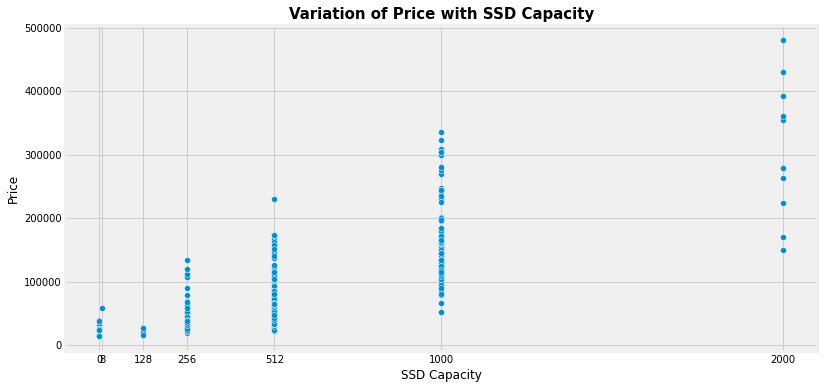

In [59]:
plt.figure(figsize=(12,6))
plt.title('Variation of Price with SSD Capacity', fontsize=15, fontweight='bold')
sns.scatterplot(data=df, y='Price', x='SSD Capacity')
plt.xticks(ticks=df['SSD Capacity'].value_counts().index, minor=False)
plt.show()

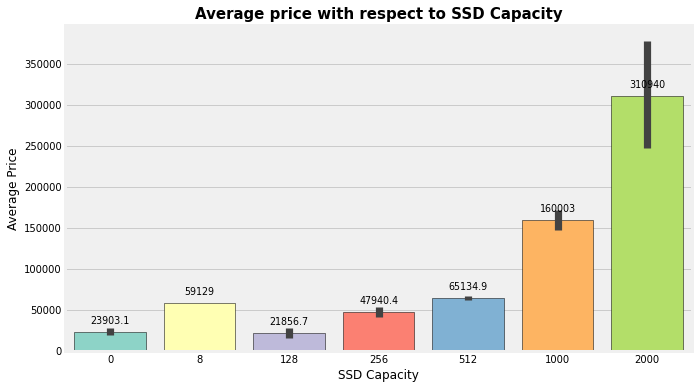

In [60]:
plt.figure(figsize=(10,6))
plt.title('Average price with respect to SSD Capacity', fontsize=15, fontweight='bold')
ax=sns.barplot(data=df, x='SSD Capacity', y='Price',\
            palette='Set3', saturation=1, edgecolor='k', estimator='mean')
ax.bar_label(container=ax.containers[0], label_type="edge",
                     padding=6, size=9.5,color="black",rotation=0)
ax.set_ylabel('Average Price')
plt.show()

#### Observations for `Price Vs SSD Capacity`:
- There is a lot of variation in the price of laptops with the same SSD capacity. This means that there are many factors other than SSD capacity that affect the price of a laptop, such as the brand, the processor, and the screen size.
- It can be seen that the variation in range of price increases as the SSD Capacity increases. This can be inferred from the barplot which shows an increase in the average price as the SSD Capacity increases. 
- An anomaly is noticebale in case of 8GB SSD which is due to the only instance available, as seen in the univariate analysis of SSD Capacity, this case belongs to the HP convertible laptop priced around 59000.
- Outliers indicates some very expensive products as seen earlier with gaming laptops.

### Price Vs RAM

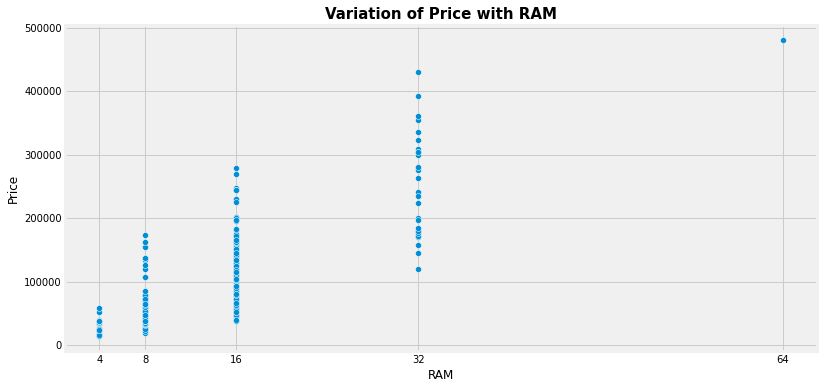

In [61]:
plt.figure(figsize=(12,6))
plt.title('Variation of Price with RAM', fontsize=15, fontweight='bold')
sns.scatterplot(data=df, y='Price', x='RAM')
plt.xticks(ticks=df['RAM'].value_counts().index, minor=False)
plt.show()

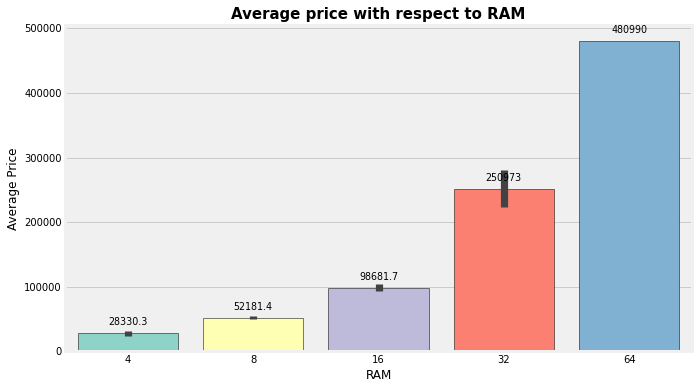

In [62]:
plt.figure(figsize=(10,6))
plt.title('Average price with respect to RAM', fontsize=15, fontweight='bold')
ax=sns.barplot(data=df, x='RAM', y='Price',\
            palette='Set3', saturation=1, edgecolor='k', estimator='mean')
ax.bar_label(container=ax.containers[0], label_type="edge",
                     padding=6, size=9.5,color="black",rotation=0)
ax.set_ylabel('Average Price')
plt.show()

#### Observations for `Price Vs RAM`:
- Laptops with more RAM tend to be more expensive, which can also be inferred from the barplot.
- Variation in the price range of laptops with the same RAM possibly indicates other factors than RAM that affect the price of a laptop, such as the brand, the processor, and the screen size.
- As seen earlier in univariate analysis of price and RAM the outlier with 64 Gb RAM is the gaming laptop by MSI.

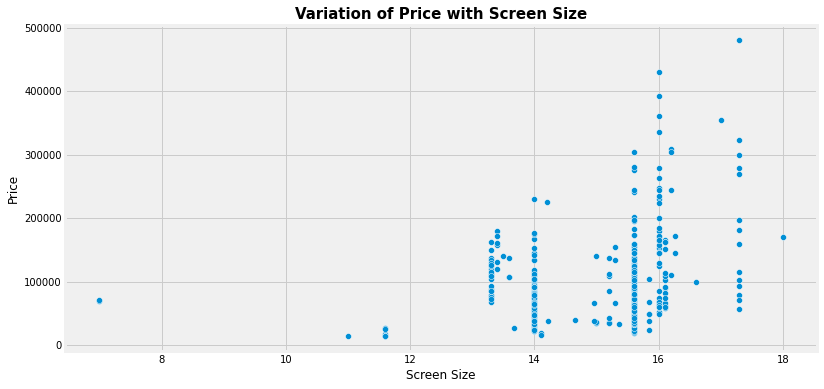

In [63]:
plt.figure(figsize=(12,6))
plt.title('Variation of Price with Screen Size', fontsize=15, fontweight='bold')
sns.scatterplot(data=df, y='Price', x='Screen Size')
plt.show()

#### Observations for `Price Vs Screen Size`:
- As observed in univarite analysis of screen size, the 50% of laptops having screen size between 14 to 16 inches has price mostly in a range of 20,000 to 200,000.
- It is observed that there is range of prices available for the same screen size.
- The smallest screen sized ones are the handheld gaming pc.

### Price Vs Weight

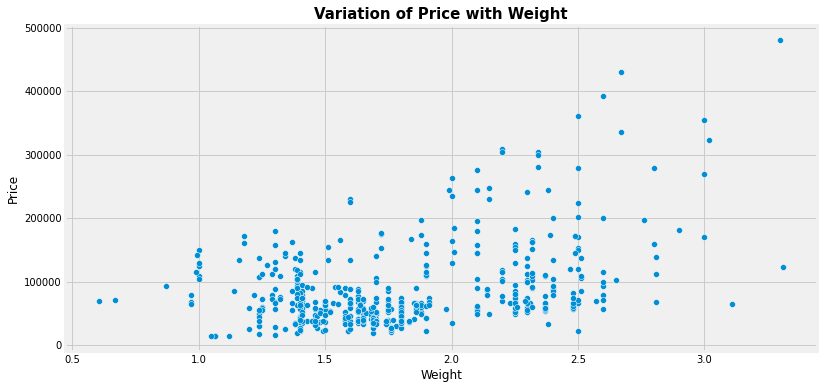

In [64]:
plt.figure(figsize=(12,6))
plt.title('Variation of Price with Weight', fontsize=15, fontweight='bold')
sns.scatterplot(data=df, y='Price', x='Weight')
plt.show()

#### Observations for `Price Vs Weight`
- There is a lot of variations in the prices of the laptops with same weight.
- Most fall in the range of 1 to 2 Kgs with prices in the range of 15,000 to 1,50,000.
- Many outliers are also observed.

### Price Vs ppi

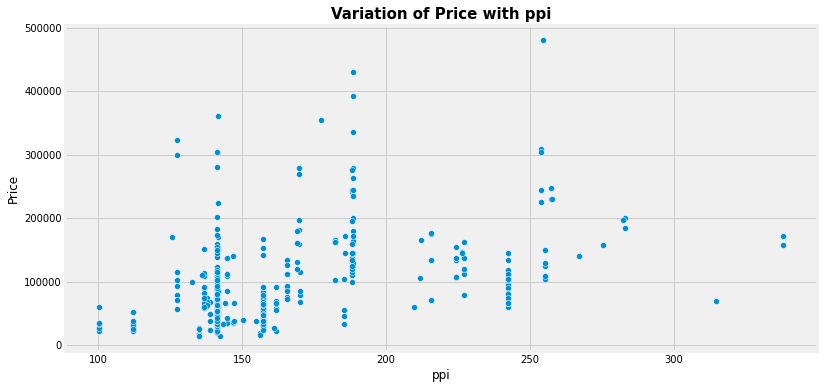

In [65]:
plt.figure(figsize=(12,6))
plt.title('Variation of Price with ppi', fontsize=15, fontweight='bold')
sns.scatterplot(data=df, y='Price', x='ppi')
plt.show()

In [66]:
df[(df['ppi']<=150) & (df['Price']>190000)]

,Brand,Price,Type,Processor Brand,Processor Name,SSD,SSD Capacity,HDD Capacity,EMMC Storage Capacity,RAM,GPU Brand,Operating System,Touchscreen,Screen Size,Fingerprint Sensor,Backlit Keyboard,x_res,y_res,Screen Type,Weight,ppi
238,ASUS,224990,Gaming Laptop,AMD,Ryzen 7 Octa Core,Yes,2000,0,0,32,NVIDIA,Windows 11 Home,No,16.0,No,Yes,1920,1200,WUXGA,2.50,141.51
322,DELL,304990,Gaming Laptop,Intel,Core i9,Yes,1000,1000,0,32,NVIDIA,Windows 11 Home,No,15.6,No,Yes,1920,1080,FHD,2.34,141.21
353,ALIENWARE,202490,Gaming Laptop,Intel,Core i7,Yes,1000,0,0,16,NVIDIA,Windows 10 Home,No,15.6,No,Yes,1920,1080,FHD,2.50,141.21
382,DELL,323990,Gaming Laptop,Intel,Core i9,Yes,1000,0,0,32,NVIDIA,Windows 11 Home,No,17.3,No,Yes,1920,1080,FHD,3.02,127.34
391,ASUS,361990,Gaming Laptop,AMD,Ryzen 9 Octa Core,Yes,2000,0,0,32,NVIDIA,Windows 11 Home,No,16.0,No,Yes,1920,1200,WUXGA,2.50,141.51
430,DELL,300490,Gaming Laptop,Intel,Core i7,Yes,1000,0,0,32,NVIDIA,Windows 11 Home,No,17.3,No,Yes,1920,1080,FHD,2.34,127.34
477,DELL,280490,Gaming Laptop,Intel,Core i7,Yes,1000,0,0,32,NVIDIA,Windows 11 Home,No,15.6,No,Yes,1920,1080,FHD,2.34,141.21


#### Observations for `Price Vs ppi`
- As observed in univariate analysis, the x_res, y_res, largely has discrete numeric values which  is why there is variation in price range over the same ppi.
- There are instances where the ppi is very high (>300) and the price is between 100K to 200K which is not consistent with the instances where ppi is below 150 and price range is above 200K. On further analysis it is found that these are the gaming laptops with high processor performance(core i7, core i9, Ryzen 9) and dedicated GPUs, which could be the possible reason for the inconsistency in price.

### Categorical-Numerical attributes

In [67]:
df.select_dtypes(include='object').columns

Index(['Brand', 'Type', 'Processor Brand', 'Processor Name', 'SSD',
       'GPU Brand', 'Operating System', 'Touchscreen', 'Fingerprint Sensor',
       'Backlit Keyboard', 'Screen Type'],
      dtype='object')

#### Creating a function to plot Avg price with respect to categorical attributes

In [68]:
def avg_price_with(obj):
    """Creates a Barplot showing Average price with repect to a categorical attribute. 
       Function Accepts a string object which is the name of the column."""
    plt.figure(figsize=(14,7.5))
    plt.title(f'Average price with respect to {obj}', fontsize=15, fontweight='bold')
    ax=sns.barplot(data=df, x=df[obj], y='Price',\
                palette='Set3', saturation=1, edgecolor='k', estimator='mean')
    ax.bar_label(container=ax.containers[0], label_type="edge",
                         padding=6, size=9.5,color="black",rotation=0)
    ax.set_ylabel('Average Price')
    plt.xticks(rotation=45)
    plt.show()

### Avg Price Vs Brand

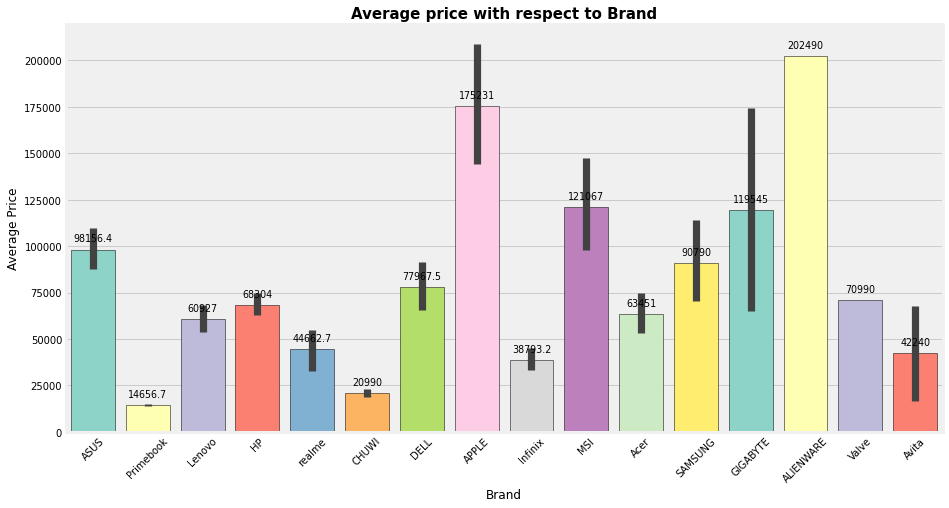

In [69]:
avg_price_with('Brand')

#### Observations for `Avg Price Vs Brand`:
- It is important to note first of all the number of laptops by brands like Primebook, realme, CHUWI, GIGABYTE, Avita, ALIENWARE, Valve in the dataset  are very few (less than 10 instances), therefore the avg price for these cases are not reliable for any further analysis.
- Taking into account the above condition, it can be observed that APPLE laptops have the highest average price followed by MSI and Dell in top 3.
- ASUS average price is around 100K and for HP around 70K. Note that ASUS has the largest number of instances in the dataset which is followed by HP. 
          

### Avg Price Vs Type

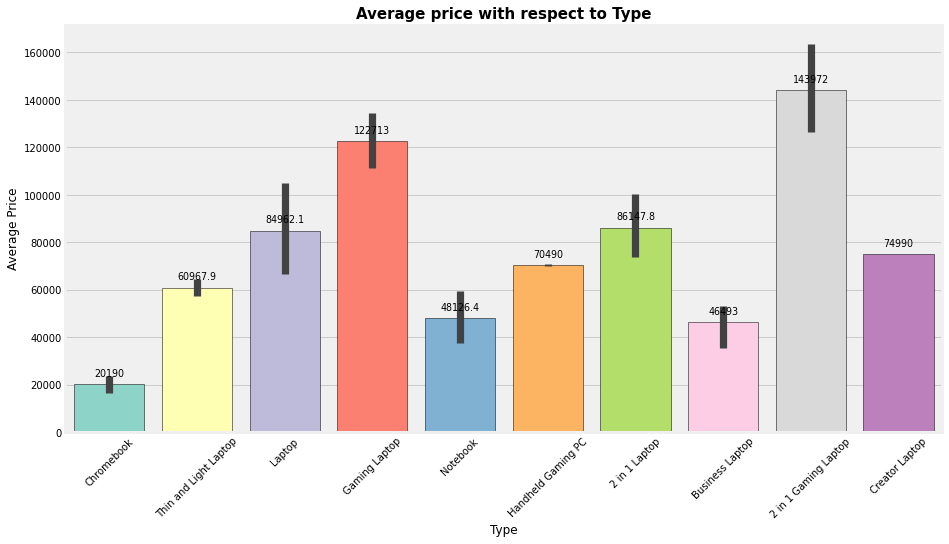

In [70]:
avg_price_with('Type')

#### Observations for `Avg Price Vs Type`
- Gaming category has the highest average price among all the categories which is followed by general-purpose, convertible laptops, thin and light laptops.
- The reason for gaming laptops to be expensive is that due to their specialized hardware, including high-end graphics cards and powerful processors.

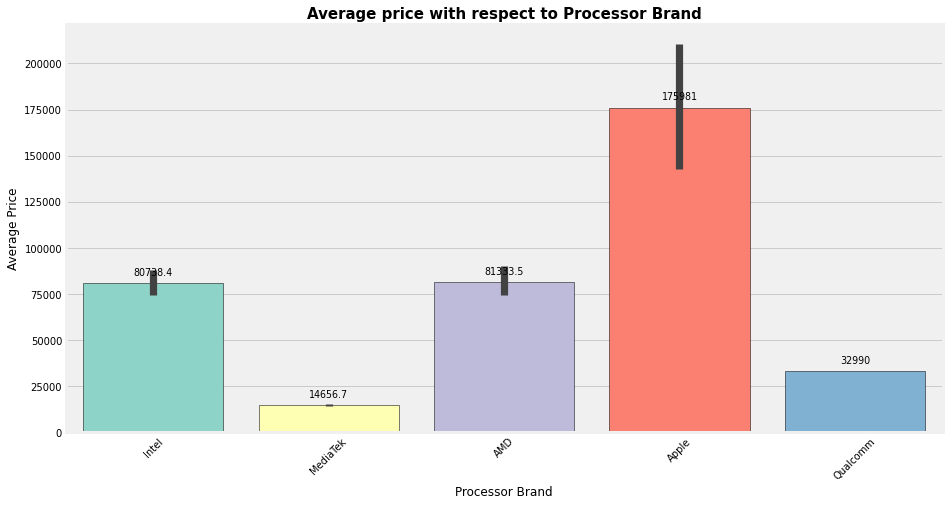

In [71]:
avg_price_with('Processor Brand')

#### Observations for `Avg Price Vs Processor Brand`:
- Apple processors are the costliest with higher variability in average price which can be associated with less number of instances (about 26) in the dataset.
- The next two processors large in number are intel and AMD which costs around the same, even though AMD have become a prominent choice in the gaming market.
- Note that as observed in the univariate analysis Qualcomm, MediaTek have fewer instances in the dataset.

### Avg Price Vs SSD (Yes or No)

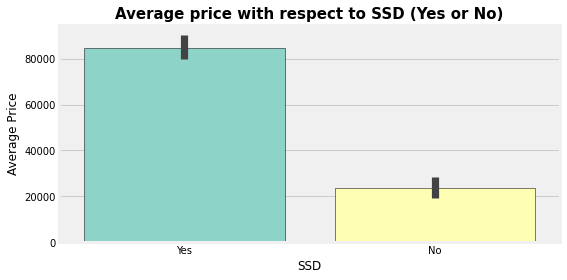

In [72]:
plt.figure(figsize=(8,4))
plt.title(f'Average price with respect to SSD (Yes or No)', fontsize=15, fontweight='bold')
sns.barplot(data=df, x='SSD', y='Price',\
            palette='Set3', saturation=1, edgecolor='k', estimator='mean', order=['Yes','No'])
plt.ylabel('Average Price')
plt.show()

#### Observations for `Avg Price Vs SSD (Yes or No)`:
- As expected the laptops with SSD are more costlier than the ones with non-SSDs. This observation is associated with the fact that SSDs offer numerous advantages in terms of performance, durability, and energy efficiency, these benefits often come at a higher cost due to the advanced technology and manufacturing processes involved in producing SSDs.  

### Avg Price Vs Operating System

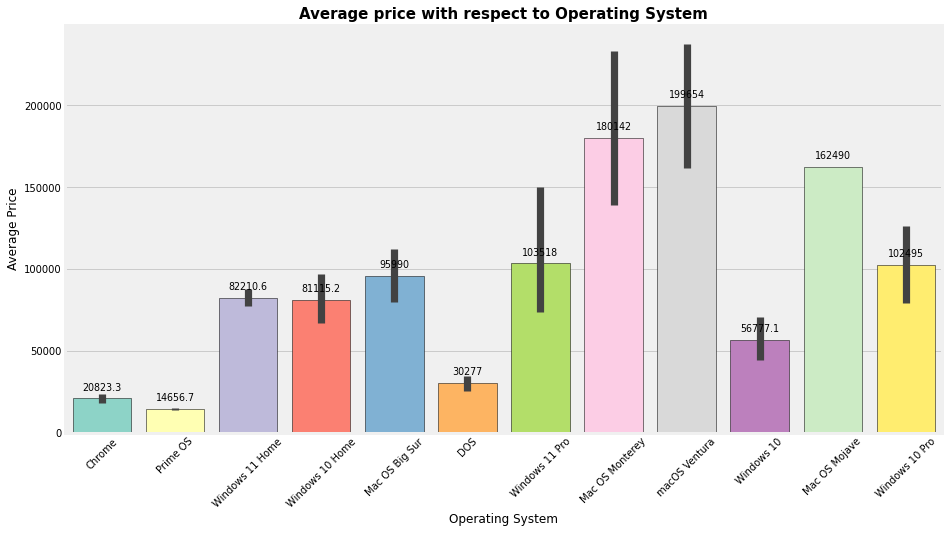

In [73]:
avg_price_with('Operating System')

#### Observations for `Avg Price Vs Processor Brand`:
- The consistency in the higher average prices concerned with the apple brand can also be observed in case of the operating system in the laptop.
- In this case also the apple operating system (taking into account all the types of versions available) has higher average price than OS such as Windows, Chrome.

### Variation of Price within the Processor Brand i.e with Processor name

In [74]:
df2=df.groupby(by=['Processor Brand','Processor Name'], as_index=False)['Price'].mean().\
            sort_values(by=['Processor Brand','Price'], ascending=[True,True])
df2=df2.reset_index().drop(columns=['index'])
df2

,Processor Brand,Processor Name,Price
0,AMD,Athlon Dual Core,27800.333333
1,AMD,Ryzen 3 Dual Core,34658.555556
2,AMD,Ryzen 3 Hexa Core,35817.000000
3,AMD,Ryzen 3 Quad Core,37310.357143
4,AMD,Ryzen 5 Quad Core,49841.666667
5,AMD,Ryzen 5 Octa Core,56859.666667
6,AMD,Ryzen 5 Hexa Core,60396.017241
7,AMD,Ryzen 7 Dual Core,65990.000000
8,AMD,Ryzen Z1 Octa Core,69990.000000
9,AMD,Zen 2,70990.000000


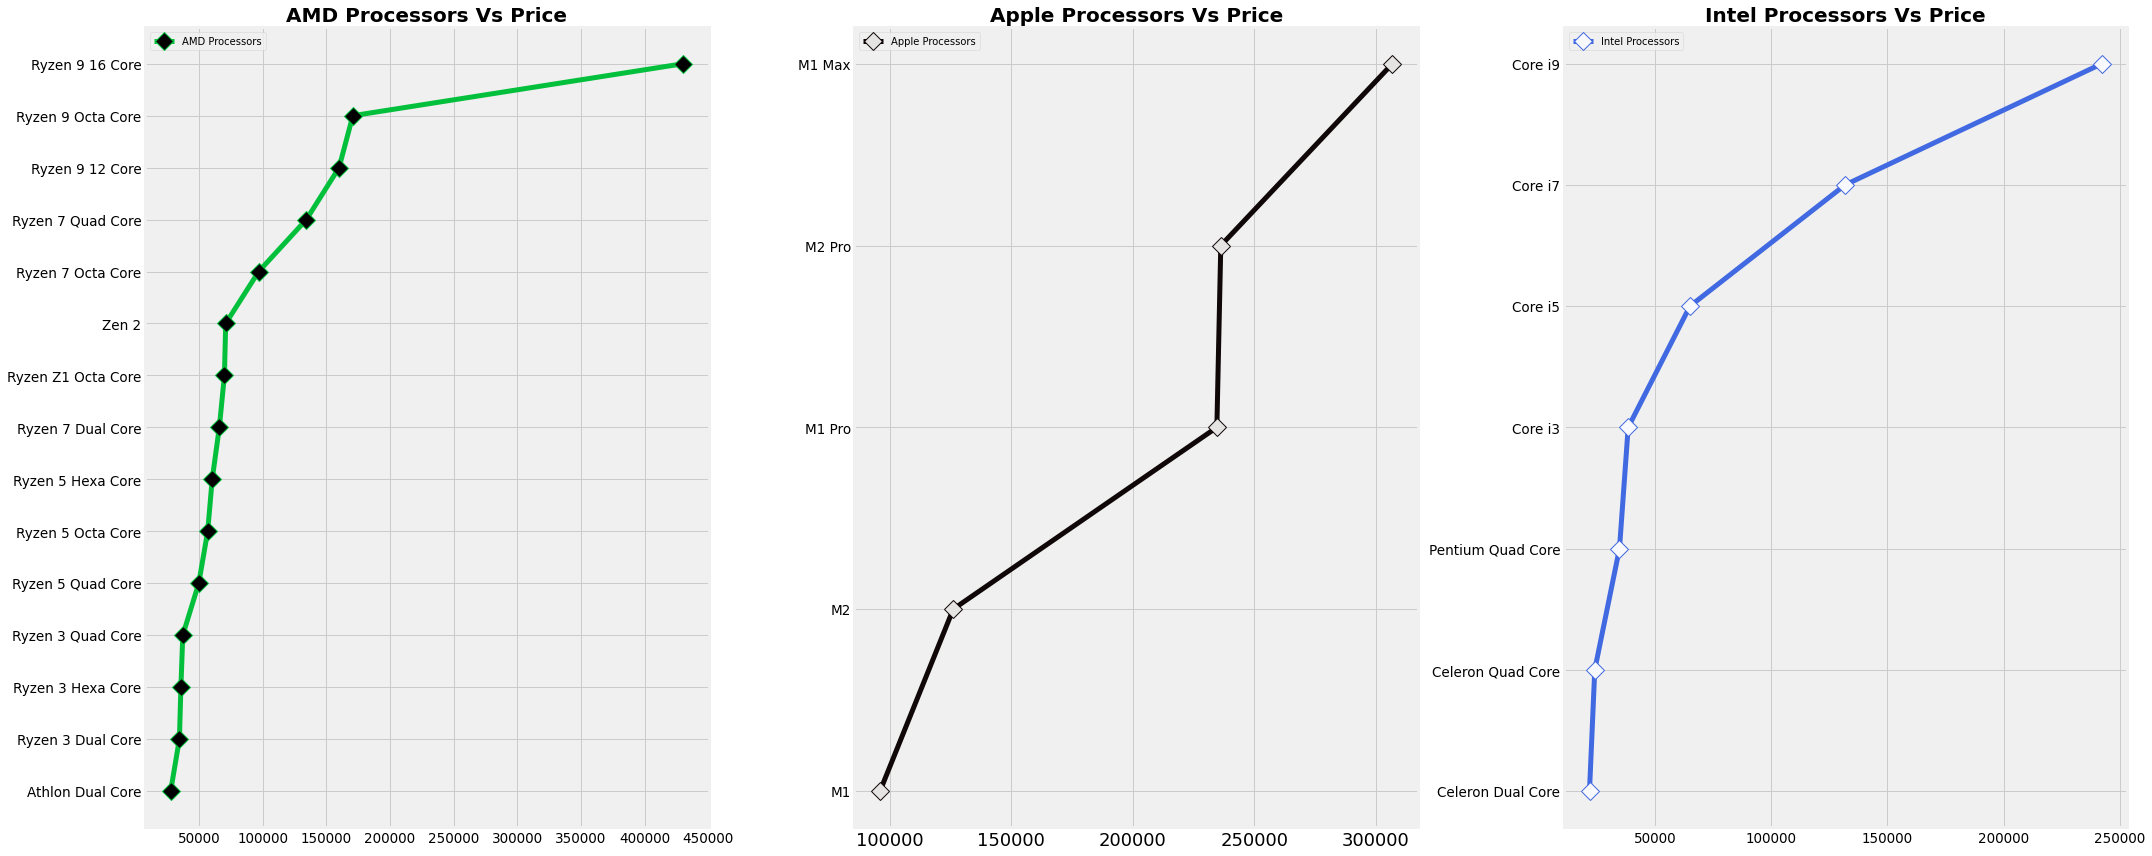

In [75]:
amd_df=df2[df2['Processor Brand']=='AMD']
apple_df=df2[df2['Processor Brand']=='Apple']
intel_df=df2[df2['Processor Brand']=='Intel']


import matplotlib.ticker as mticker



fig, ax= plt.subplots(nrows=1, ncols=3, figsize=(30,12))

    
# AMD Processors Vs Price line chart
ax[0].set_title("AMD Processors Vs Price", {'fontsize': 20,
                                            'fontweight': 'bold'})
ax[0].plot(amd_df['Price'], amd_df['Processor Name'],color='#03c03c',mfc='#000000',\
         linewidth=5,marker='D',markersize=13,label='AMD Processors')
ax[0].legend(loc='upper left')
ax[0].tick_params(axis='x', labelsize=13.5)
ax[0].tick_params(axis='y', labelsize=13.5)


# Apple Processors Vs Price line chart
ax[1].set_title("Apple Processors Vs Price", {'fontsize': 20,
                                            'fontweight': 'bold'})
ax[1].plot(apple_df['Price'], apple_df['Processor Name'],color='#0f0708',mfc='#e5e4e2',\
         linewidth=5,marker='D',markersize=13,label='Apple Processors')
ax[1].legend(loc='upper left')
ax[1].tick_params(axis='x', labelsize=18)
ax[1].tick_params(axis='y', labelsize=13.5)

# Intel Processors Vs Price line chart
ax[2].set_title("Intel Processors Vs Price", {'fontsize': 20,
                                            'fontweight': 'bold'})
ax[2].plot(intel_df['Price'], intel_df['Processor Name'],color='#4169e1',mfc='#f8f8ff',\
         linewidth=5,marker='D',markersize=13,label='Intel Processors')
ax[2].legend(loc='upper left')
ax[2].tick_params(axis='x', labelsize=13.5)
ax[2].tick_params(axis='y', labelsize=13.5)

#for axis in ax:
    #axis.set_xticklabels([f'{int(val/1000)}K' for val in axis.get_xticks()])

plt.tight_layout()
plt.show()

#### Observations for `Price Vs Processor`:
- It is clearly noticeable that as the number in processor name (which indicates performance of the processor as in for example 9 in core i9) increases irrespective of the processor brand, the price of the laptop also increases.

### Avg Price Vs Screen Type

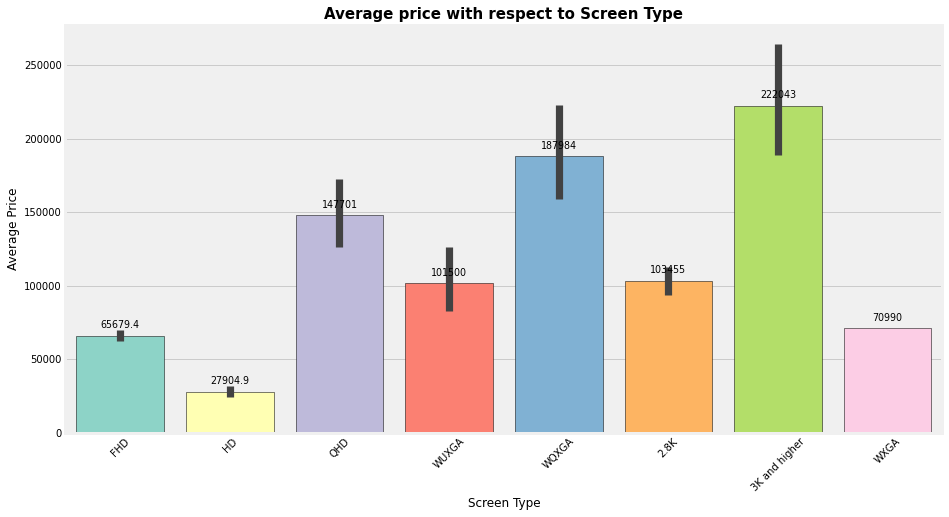

In [76]:
avg_price_with('Screen Type')

#### observations for `Avg Price Vs Screen Type`:
- An increase in average price of laptops can be seen as the screen type goes from HD to WQXGA, then a sudden decrease is noticed for 2.8K screen type, further the average price increase again for 3K and higher resolution.

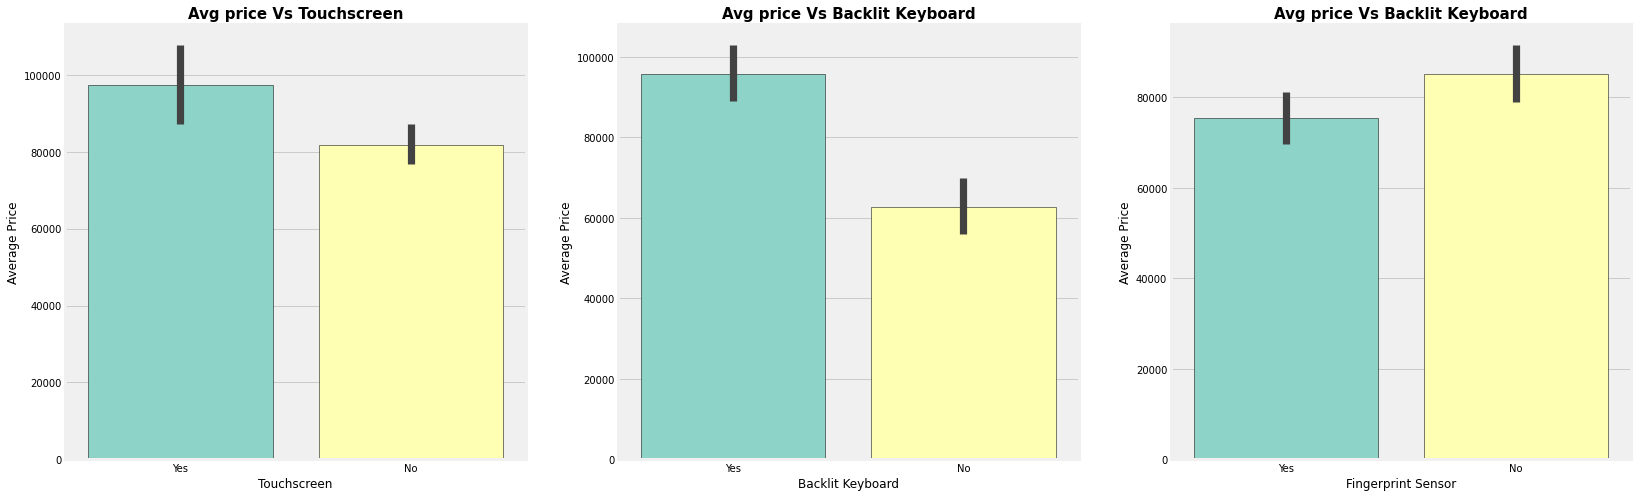

In [77]:
fig, ax=plt.subplots(nrows=1,ncols=3, figsize=(25,8))


ax[0].set_title(f'Avg price Vs Touchscreen', fontsize=15, fontweight='bold')
sns.barplot(data=df, x='Touchscreen', y='Price',palette='Set3',\
            saturation=1, edgecolor='k', estimator='mean', ax=ax[0], order=['Yes','No'])
ax[0].set_ylabel('Average Price')

ax[1].set_title(f'Avg price Vs Backlit Keyboard', fontsize=15, fontweight='bold')
sns.barplot(data=df, x='Backlit Keyboard', y='Price',palette='Set3',\
            saturation=1, edgecolor='k', estimator='mean', ax=ax[1], order=['Yes','No'])
ax[1].set_ylabel('Average Price')

ax[2].set_title(f'Avg price Vs Backlit Keyboard', fontsize=15, fontweight='bold')
sns.barplot(data=df, x='Fingerprint Sensor', y='Price',palette='Set3',\
            saturation=1, edgecolor='k', estimator='mean', ax=ax[2], order=['Yes','No'])
ax[2].set_ylabel('Average Price')

plt.show()

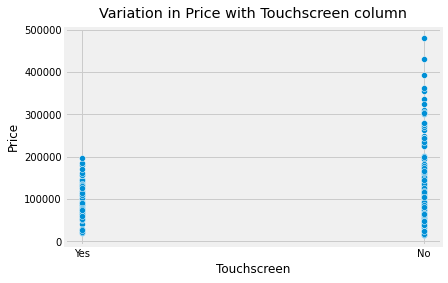

In [78]:
plt.title('Variation in Price with Touchscreen column', pad=10)
sns.scatterplot(data=df, x='Touchscreen', y='Price')
plt.show()

#### Observations for `Avg Price Vs (Touchscreen, Backlit Keyboard, Fingerprint Sensor)`
- Except in case of fingerprint sensor, all other additional features in a laptop results in increase in average price if the feature is present in the laptop.
- On further analysis it is observed that the case when fingerprint sensor is not present and average price is high could be associated to the wide range of prices available for 'No' case than the 'Yes' case. This is also attributed to the fact that there are more instances of the laptops with 'No' fingerprint cases as found during univariate analysis of touchscreen column.

### ---------------------------------------------------------------------------------------------------------------------------------------------------------
## Multivariate Analysis

### Price Vs Weight according to the type of laptop

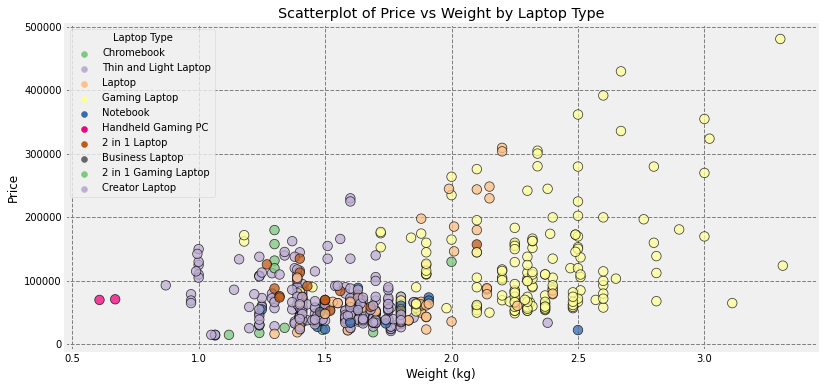

In [79]:
plt.figure(figsize=(12, 6))
sns.scatterplot(
    data=df,
    x="Weight",
    y="Price",
    hue="Type",
    s=90,
    palette="Accent",  
    linewidths=0.5,
    alpha=0.75,
    edgecolor="black",
)

plt.title("Scatterplot of Price vs Weight by Laptop Type")
plt.xlabel("Weight (kg)")
plt.ylabel("Price")
plt.grid(True, linestyle="--", color="grey")
plt.legend(title='Laptop Type')  
plt.show()

#### Observations of `Scatterplot of Price Vs Weight by Laptop Type` 

- The heaviest laptops are Gaming Laptops and scatteret almost in all directions as the weight exceeds 2kg. They are also the most expensive type of laptop. Also, there is a wider range of prices for Gaming laptops compared to other types of laptops.
- Thin and light, 2 in 1 laptops, Notebooks, 2 in 1 gaming laptops largely falls under the weight range of 1kg to 2kg with price ranging from 20K to 200K rupees.
- The general purpose laptops categorized as just laptop can be seen till 2.25kg with price ranging from 20K to 300K.

### Avg Price Vs Type for the major Brands

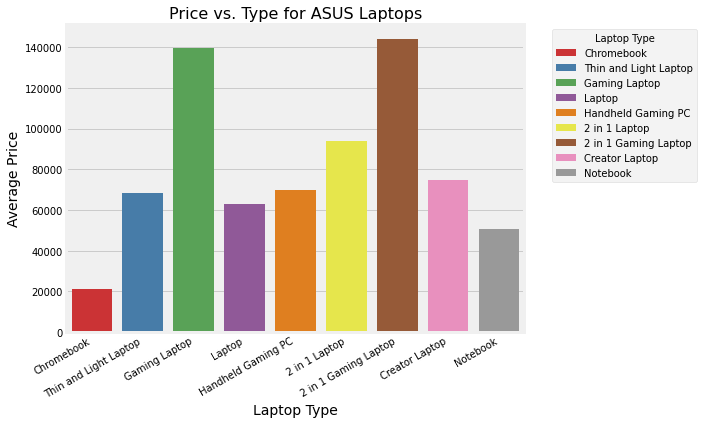

******************************************************************************************


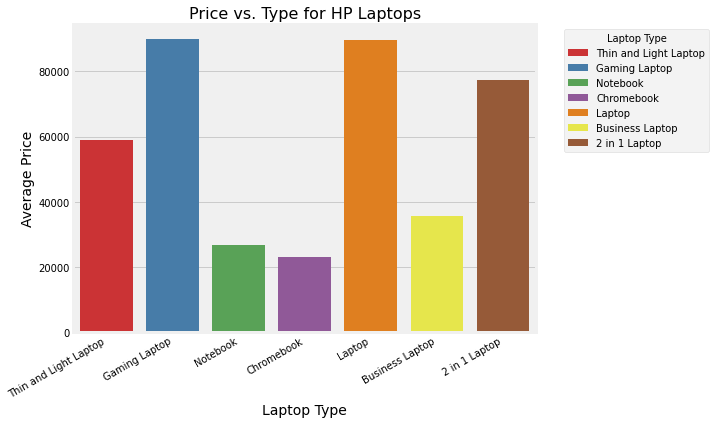

******************************************************************************************


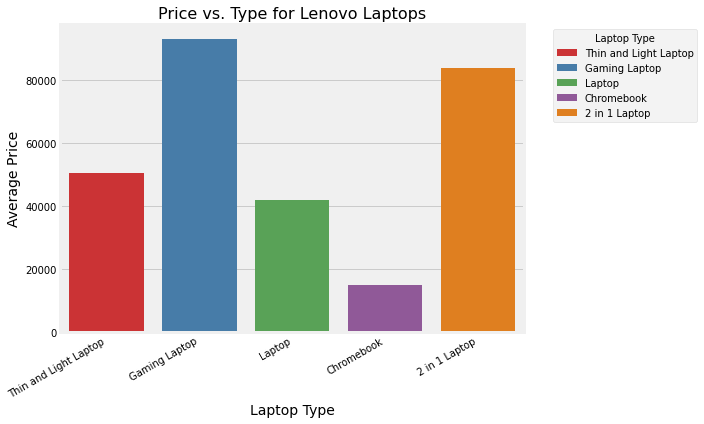

******************************************************************************************


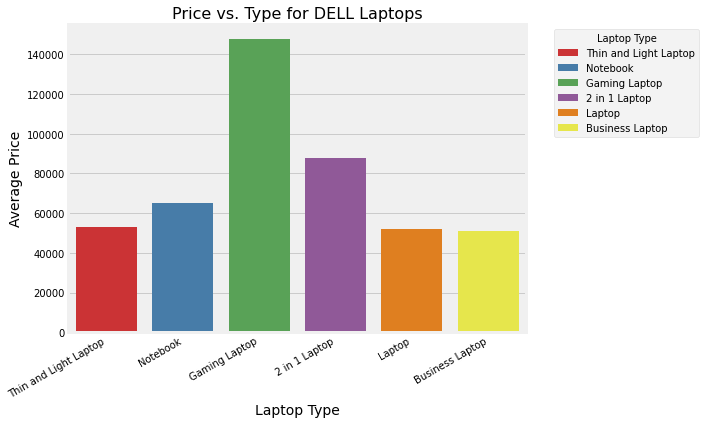

******************************************************************************************


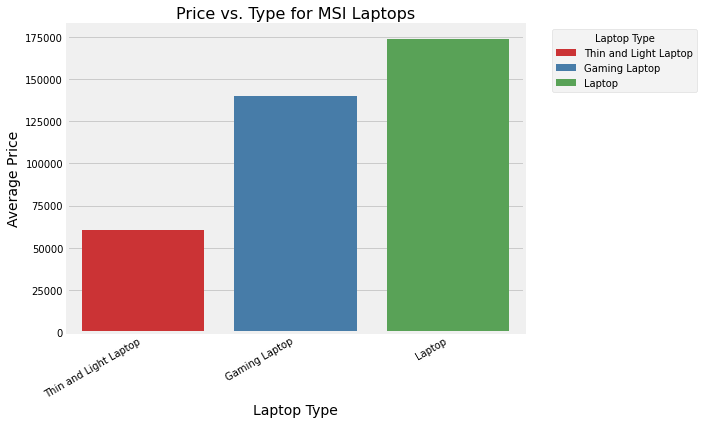

******************************************************************************************


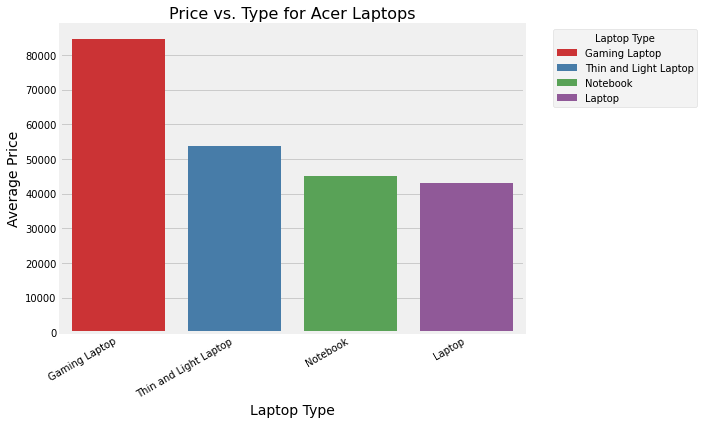

******************************************************************************************


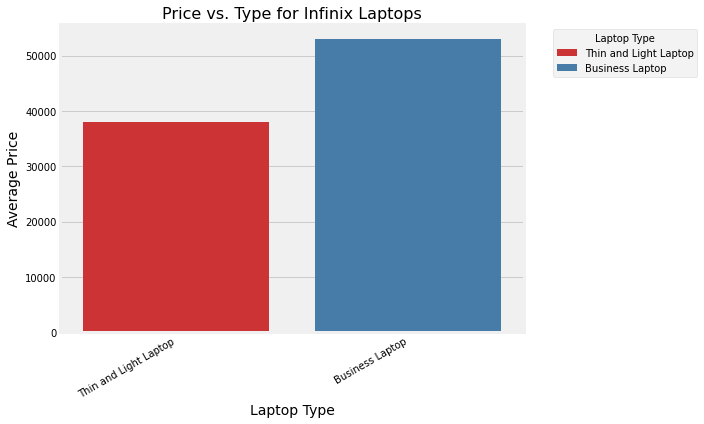

******************************************************************************************


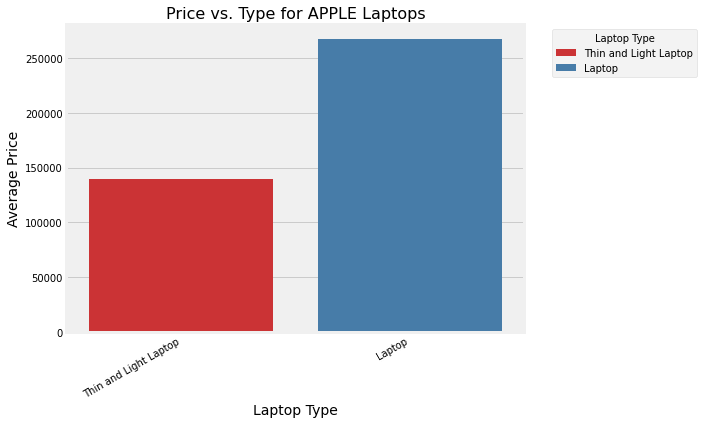

******************************************************************************************


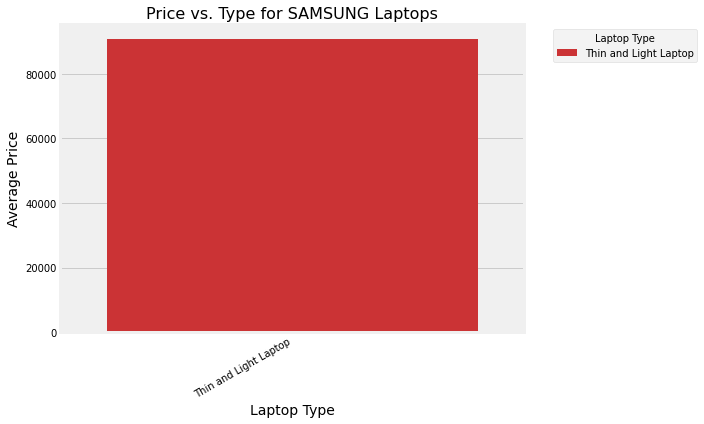

******************************************************************************************


In [80]:
major_brands_lst=list(df['Brand'].value_counts()[:9].index)

for col in major_brands_lst:
    labels=list(df[df['Brand']==col]['Type'].unique())
    
    plt.figure(figsize=(10,6))
    sns.barplot(data=df[df['Brand']==col], x='Type',y='Price', palette='Set1', label=labels, errorbar=None)
    plt.legend(title='Laptop Type', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.xticks(rotation=30, ha='right')
    plt.xlabel('Laptop Type', fontsize=14)
    plt.ylabel('Average Price', fontsize=14)
    plt.title(f'Price vs. Type for {col} Laptops', fontsize=16)
    plt.legend(title='Laptop Type', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()
    print("******************************************************************************************")



#### Inspecting why Average price of MSI Gaming laptops is less than MSI general purpose laptops

In [81]:
temp_df=pd.read_excel('NO_NullValue_LaptopsData.xlsx')

In [82]:
temp_df[temp_df['Name'].str.split().str[0]=='MSI'].sort_values(by='Type')

,Name,Price,Type,Processor Brand,Processor Name,SSD,SSD Capacity,HDD Capacity,EMMC Storage Capacity,RAM,Operating System,Touchscreen,Screen Size,Fingerprint Sensor,Backlit Keyboard,x_res,y_res,Screen Type,Weight,Graphic Processor
334,MSI Stealth Core i7 8th Gen - (16 GB/512 GB SS...,"₹1,74,490",Gaming Laptop,Intel,Core i7,Yes,512 GB,0,0,16 GB,Windows 10 Home,No,39.62 cm (15.6 inch),No,Yes,1920,1080,FHD,1.88 kg,NVIDIA GeForce RTX 2060
461,MSI Core i7 13th Gen - (16 GB/2 TB SSD/Windows...,"₹2,79,990",Gaming Laptop,Intel,Core i7,Yes,2 TB,0,0,16 GB,Windows 11 Home,No,43.94 cm (17.3 Inch),No,Yes,2560,1440,QHD,2.8 Kg,NVIDIA GeForce RTX 4070
316,MSI Core i7 12th Gen - (16 GB/1 TB SSD/Windows...,"₹1,29,490",Gaming Laptop,Intel,Core i7,Yes,1 TB,0,0,16 GB,Windows 11 Home,No,39.62 cm (15.6 inch),No,Yes,2560,1440,QHD,2.25 kg,NVIDIA GeForce RTX 3060
458,MSI Raider GE66 Core i7 12th Gen - (16 GB/1 TB...,"₹2,44,990",Gaming Laptop,Intel,Core i7,Yes,1 TB,0,0,16 GB,Windows 11 Home,No,39.62 cm (15.6 inch),No,No,2560,1440,QHD,2.38 kg,NVIDIA GeForce RTX 3070 Ti
328,MSI Core i9 13th Gen - (32 GB/2 TB SSD/Windows...,"₹3,54,990",Gaming Laptop,Intel,Core i9,Yes,2 TB,0,0,32 GB,Windows 11 Home,No,43.18 cm (17 Inch),No,No,2560,1600,WQXGA,3 Kg,NVIDIA GeForce RTX 4090
450,MSI Core i5 11th Gen - (16 GB/1 TB HDD/256 GB ...,"₹62,990",Gaming Laptop,Intel,Core i5,Yes,256 GB,1 TB,0,16 GB,Windows 11 Home,No,39.62 cm (15.6 Inch),No,No,1920,1080,FHD,1.86 Kg,NVIDIA GeForce RTX 3050
335,MSI Core i5 12th Gen - (8 GB/512 GB SSD/Window...,"₹57,990",Gaming Laptop,Intel,Core i5,Yes,512 GB,0,0,8 GB,Windows 11 Home,No,39.62 cm (15.6 Inch),No,No,1920,1080,FHD,1.86 Kg,NVIDIA GeForce RTX 2050
362,MSI Katana 15 Core i5 12th Gen - (8 GB/512 GB ...,"₹69,990",Gaming Laptop,Intel,Core i5,Yes,512 GB,0,0,8 GB,Windows 11 Home,No,39.62 cm (15.6 Inch),No,Yes,1920,1080,FHD,2.25 Kg,NVIDIA GeForce RTX 3050
363,MSI Sword 15 Core i5 12th Gen - (16 GB/512 GB ...,"₹79,990",Gaming Laptop,Intel,Core i5,Yes,512 GB,0,0,16 GB,Windows 11 Home,No,39.62 cm (15.6 Inch),No,Yes,1920,1080,FHD,2.25 Kg,NVIDIA GeForce RTX 3050 Ti
365,MSI Core i9 13th Gen - (32 GB/1 TB SSD/Windows...,"₹3,35,990",Gaming Laptop,Intel,Core i9,Yes,1 TB,0,0,32 GB,Windows 11 Home,No,40.64 cm (16 Inch),No,No,2560,1600,WQXGA,2.67 Kg,NVIDIA GeForce RTX 4080


In [83]:
print(f"Laptop priced at 1,24,990: {temp_df[temp_df['Name'].str.split().str[0]=='MSI'].loc[275]['Name']}")
print()
print(f"Laptop priced at 2,44,990: {temp_df[temp_df['Name'].str.split().str[0]=='MSI'].loc[483]['Name']}")
print()
print(f"Laptop priced at 1,44,990: {temp_df[temp_df['Name'].str.split().str[0]=='MSI'].loc[446]['Name']}")
print()
print(f"Laptop priced at 1,79,990: {temp_df[temp_df['Name'].str.split().str[0]=='MSI'].loc[380]['Name']}")

Laptop priced at 1,24,990: MSI Core i7 13th Gen - (16 GB/1 TB SSD/Windows 11 Home) Prestige 16Evo A13M-266IN Laptop  (16 Inch, Urban Silver, 1.9 Kg)

Laptop priced at 2,44,990: MSI Core i7 13th Gen - (16 GB/1 TB SSD/Windows 11 Home/8 GB Graphics) Stealth 16 Studio A13VG-030IN Laptop  (16 Inch, Pure White, 1.99 Kg)

Laptop priced at 1,44,990: MSI Core i7 13th Gen - (16 GB/1 TB SSD/Windows 11 Home/4 GB Graphics) Prestige 16 A13UCX-250IN Laptop  (16 Inch, Urban Silver, 2.1 Kg)

Laptop priced at 1,79,990: MSI Core i7 13th Gen - (32 GB/1 TB SSD/Windows 11 Home) Summit E16Flip A13VET-068IN Laptop  (16 Inch, Ink Black, 2.1 Kg)


#### Observations for `Avg Price Vs Type for the major Brands`:
- ASUS, HP, Lenovo and Dell manufactures laptops in almost all the prevalent categories like gaming, notebook, thin and light and as expected gaming laptops are priced higher on an average.
- Apple laptops are the most expensive compared to others in the category of thin and light and general purpose laptops
- According to this dataset Samsung has only the thin and light laptops available for sell on flipkart priced at an average of near 90K. 
- For MSI which has a strong reputation for its gaming laptops, it can be observed that for this dataset the MSI gaming laptops are less costliers than their general purpose laptops.
    - Reason for above observation: (a note for Feature Engg.)
        - On manual inspection of the 4 instances categorized as laptops it is found that, Laptop priced at 2,44,990, at 1,79,990 is 2 in 1 Laptop, at 1,24,990 and 1,44,990 is thin and light laptop.

### Avg Price Vs HDD capacity according to whether or not SSD is present

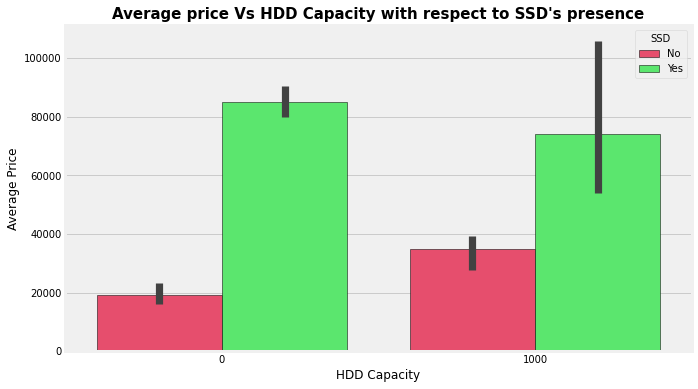

In [84]:
plt.figure(figsize=(10,6))
plt.title("Average price Vs HDD Capacity with respect to SSD's presence", fontsize=15, fontweight='bold')
ax=sns.barplot(data=df, x='HDD Capacity', y='Price', hue='SSD', errorbar="ci",\
            palette = {'Yes': '#44fd5d', 'No': '#ff355e'}, edgecolor='k', estimator='mean')
ax.set_ylabel('Average Price')
plt.show()

#### Obsevations for `Avg Price Vs HDD capacity w.r.t SSD presence`:
- The average price of laptops with SSDs is higher than the average price of laptops without SSDs.
- The error bars indicates that the average price of laptops with SSDs is more spread out than the average price of laptops without SSDs which was also inferred from the scatterplot of Price Vs SSD Capacity. This variaility can also be associated to the less number of HDD laptops in the dataset.